# Лабораторная работа №1
## Подготовка данных для построения моделей машинного обучения.
## Визуализация данных

# Регрессия
1.  Получить от преподавателя два датасета с тремя файлами (train.csv, test.csv, sample_submission.csv) для решения задач регрессии и классификации соответственно.
2.	Сделать первичную обработку данных файла train.csv (пропуски, выбросы, генерация новых признаков) для двух датасетов.
3.	Произвести визуализацию данных (распределение признаков, зависимость целевой переменной от других признаков, корреляционная матрица и т.д.) для двух датасетов и сделать выводы на основе полученных графиков.
4.	Сохранить обработанные датасеты в файл с расширением .csv для последующего построения моделей машинного обучения.

# Данные для регрессии

## Для задачи регрессии (цель - предсказание цены недвижимости):
-	Id - идентификационный номер квартиры
-	DistrictId - идентификационный номер района
-	Rooms - количество комнат
-	Square - площадь
-	LifeSquare - жилая площадь
-	KitchenSquare - площадь кухни
-	Floor - этаж
-	HouseFloor - количество этажей в доме
-	HouseYear - год постройки дома
-	Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
-	Social_1, Social_2, Social_3 - социальные показатели местности
-	Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
-	Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
-	Price - цена квартиры (целевая переменная)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scipy import stats
import numpy as np

In [76]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
path = "data/reg/"
filename_test = "test.csv"
filename_train = "train.csv"

res_test_file = path + filename_test
res_train_file = path + filename_train

test_data = pd.read_csv(res_test_file)
train_data = pd.read_csv(res_train_file)

## Предпросмотр данных

In [3]:
train_data.head() # Смотрим на первые 5 строчек, чтобы понять что у нас лежит в табличке

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
train_data.describe() # Первичный просмотр характеристик датасета

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
# for column in train_data.columns:
#     if len(train_data[column].unique()) < 80:
#         print(column)
#         print(len(train_data[column].unique()))
#         print(train_data[column].unique())
print(train_data.Floor.value_counts())
print(train_data.HouseFloor.value_counts())

Floor
4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
31      1
33      1
42      1
37      1
Name: count, dtype: int64
HouseFloor
17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
32.0        4
37.0        4
28.0        3
39.0        2
99.0        2
48.0        2
45.0        1
44.0        1
117.0       1
31.0        1
47.0        1
29.0        1
36.0        1
38.0        1
26.0        1
Name: count

## Обработка пропусков

In [6]:
train_data.isnull().sum() # Смотрим наличие пропусков

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Будем заполнять пропуски медианным значением, поскольку оно более устойчиво к выбросам,
чем среднее арифметическое и позволяет сохранить данные, в отличие от простого удаления строк

In [7]:
med = train_data.LifeSquare.median()
train_data.LifeSquare = train_data.LifeSquare.fillna(med)

In [8]:
med = train_data.Healthcare_1.median()
train_data.Healthcare_1 = train_data.Healthcare_1.fillna(med)

In [9]:
train_data.isnull().sum() # Смотрим наличие пропусков

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

## Обработка выбросов

- Для каждого столбца построим Box и гистограмму для наглядного определения выбросов.
- При обнаружении выбросов заменим их на медианное значение в случае работы с количественным признаком.
- Для каждого столбца построим Box и гистограмму для наглядной проверки правильности удаления выбросов.

In [10]:
def show_graph(column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(train_data[column], ax=axes[0])
    sns.kdeplot(train_data[column], ax=axes[1], fill=True)
    sns.boxplot(train_data[column], ax=axes[2])

def remove_outliers(column):
    show_graph(column)
    median = train_data[column].median()
    q25 = train_data[column].quantile(0.25)
    q75 = train_data[column].quantile(0.75)
    iq = q75 - q25

    min_border = q25 - 1.5 * iq
    max_border = q75 + 1.5 * iq

    mask = (train_data[column] < min_border) | (train_data[column] > max_border)

    train_data.loc[mask, column] = median

    show_graph(column)


C:\Users\Gleb\AppData\Local\Temp\ipykernel_14712\1596642937.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8394.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[mask, column] = median
C:\Users\Gleb\AppData\Local\Temp\ipykernel_14712\1596642937.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))


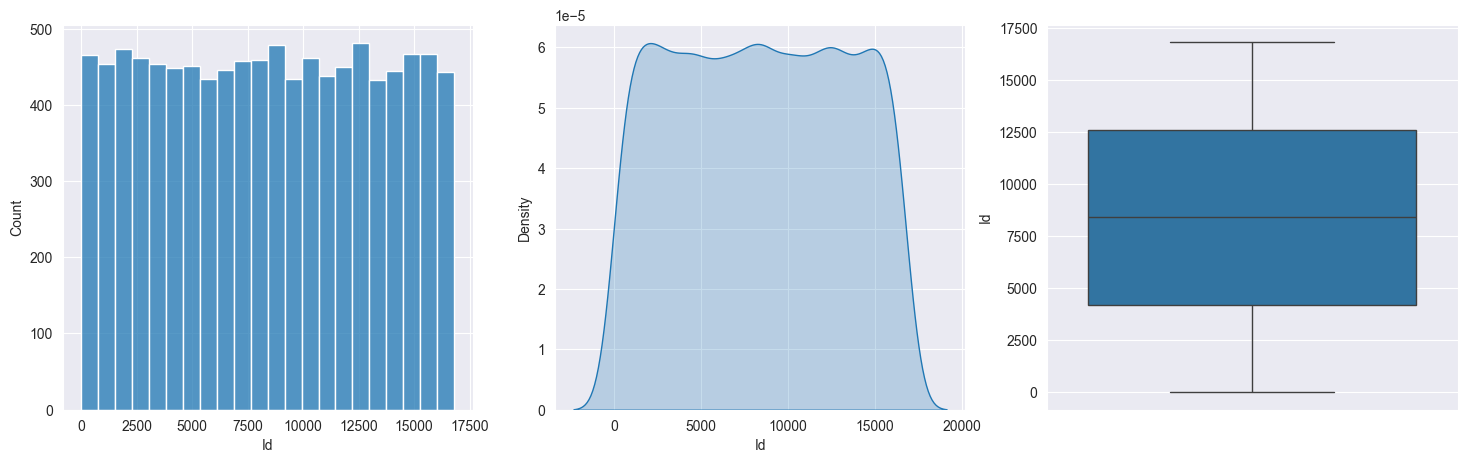

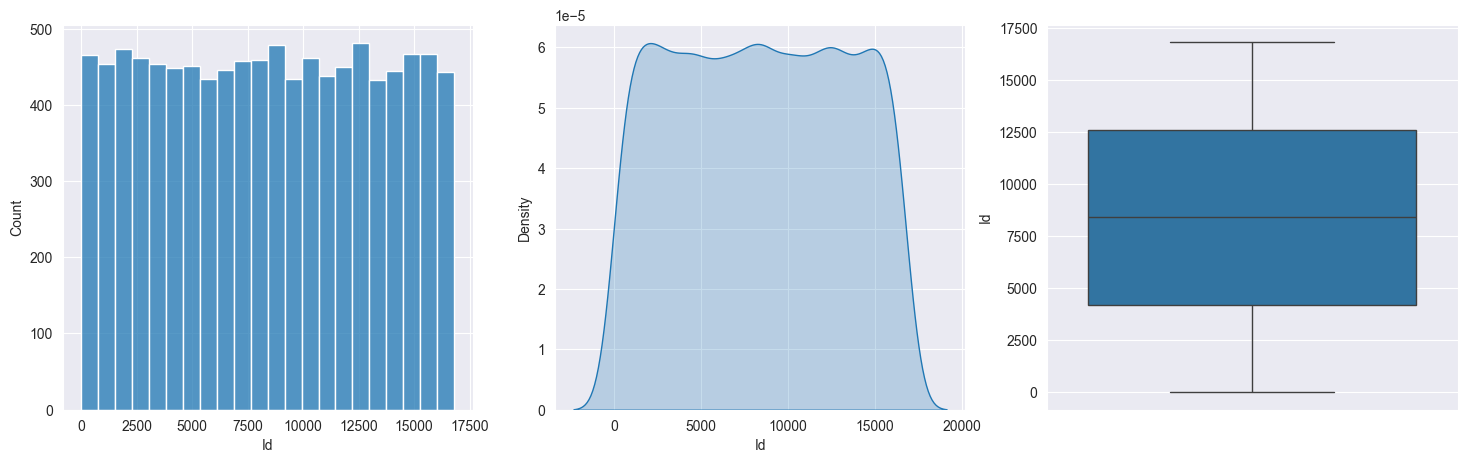

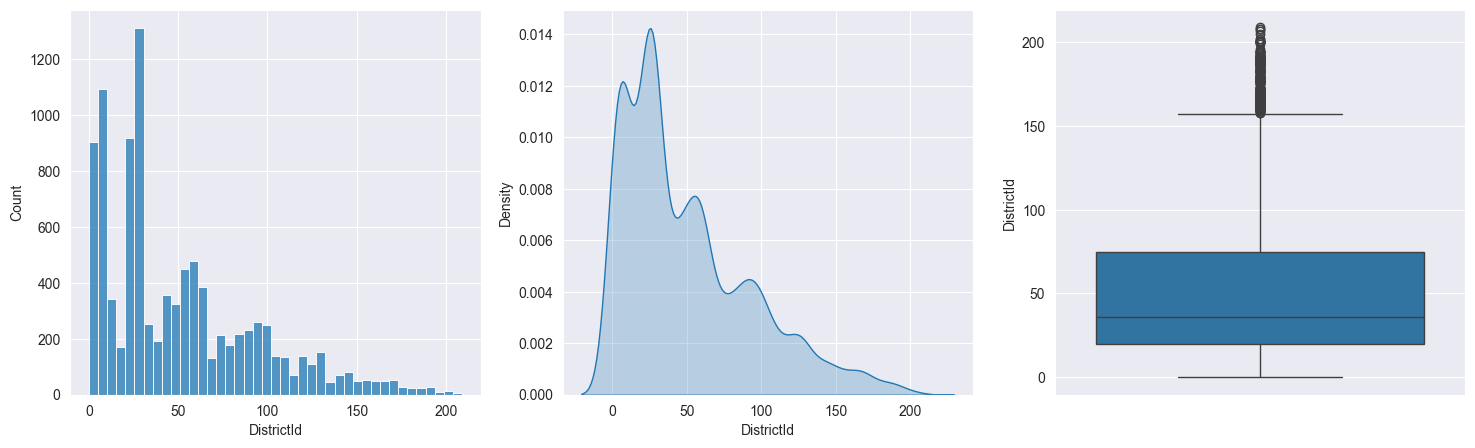

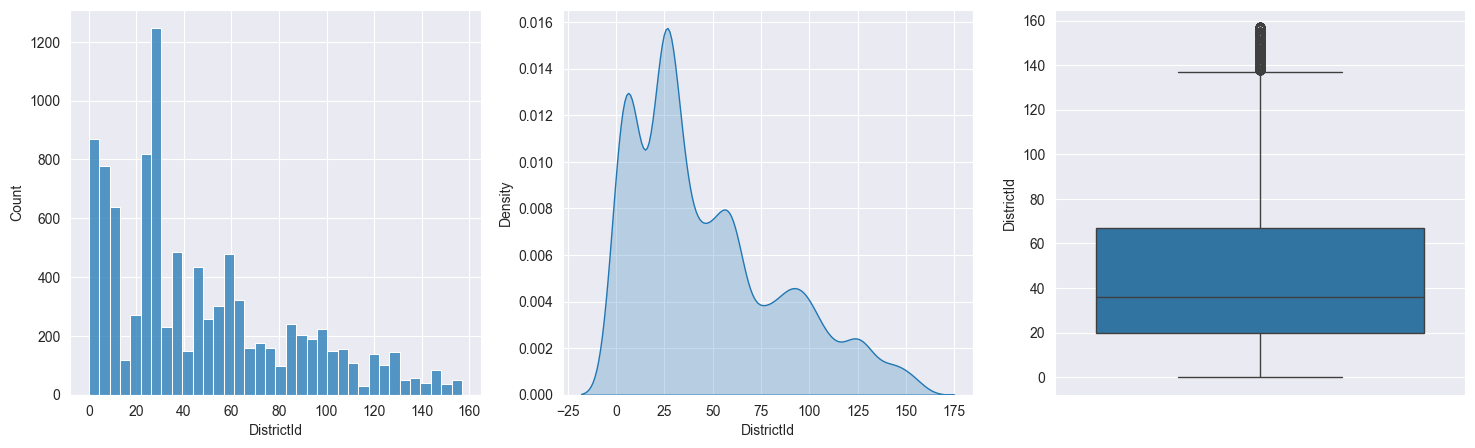

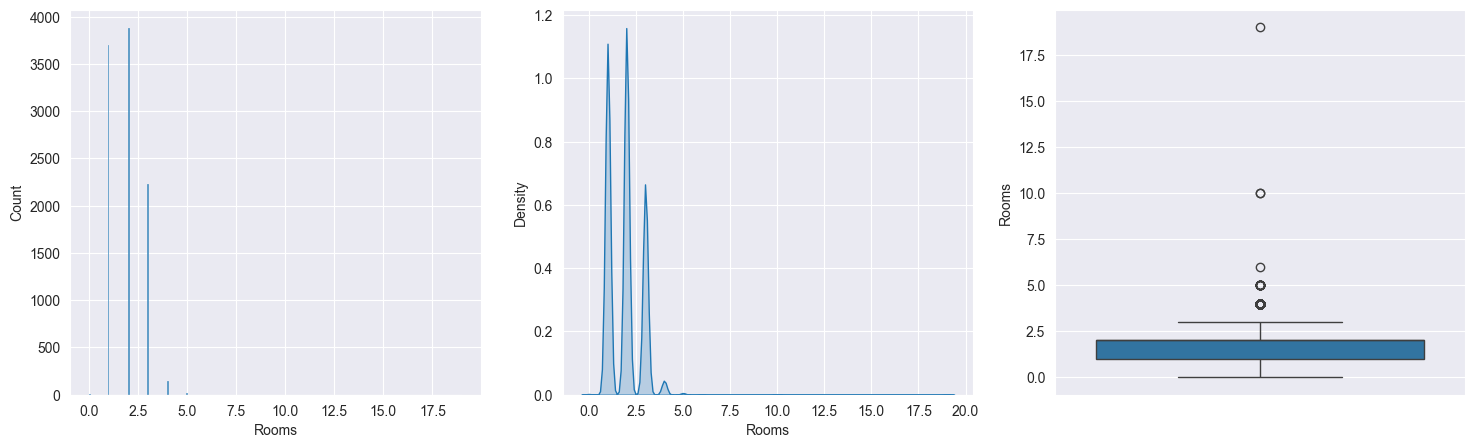

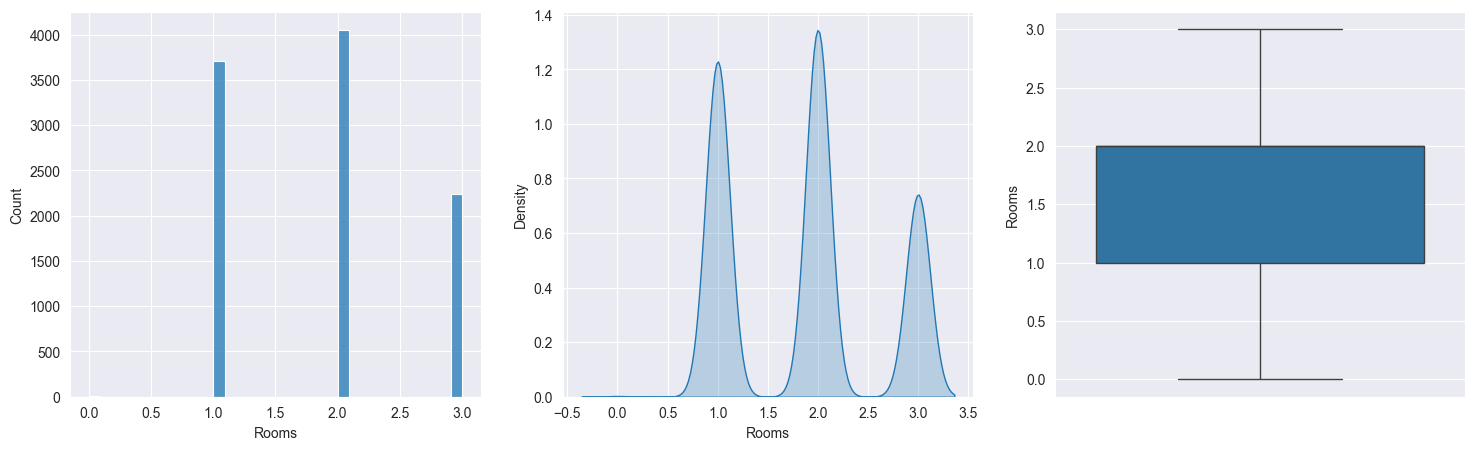

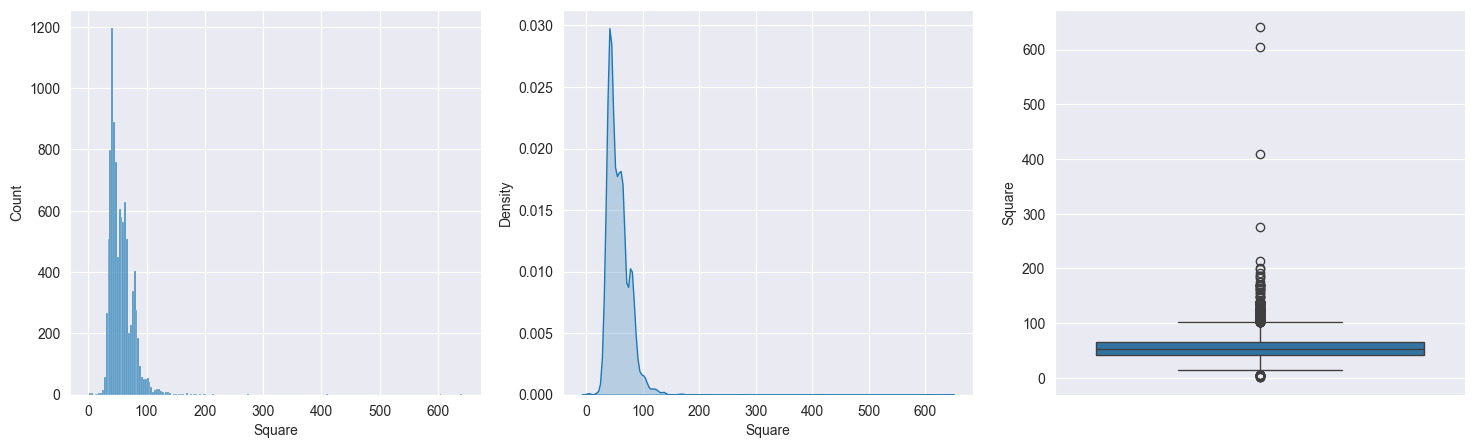

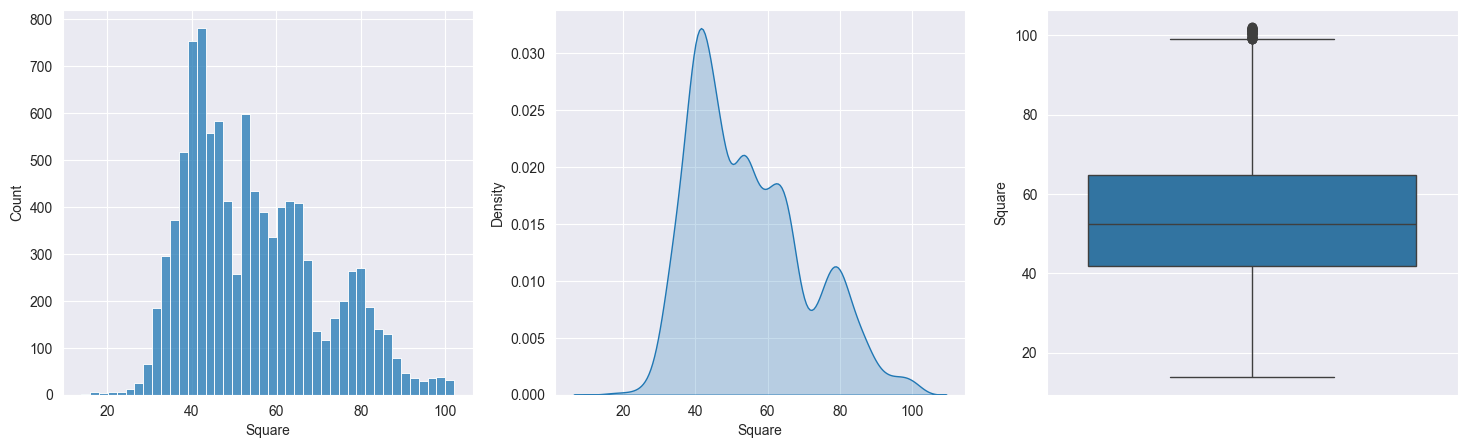

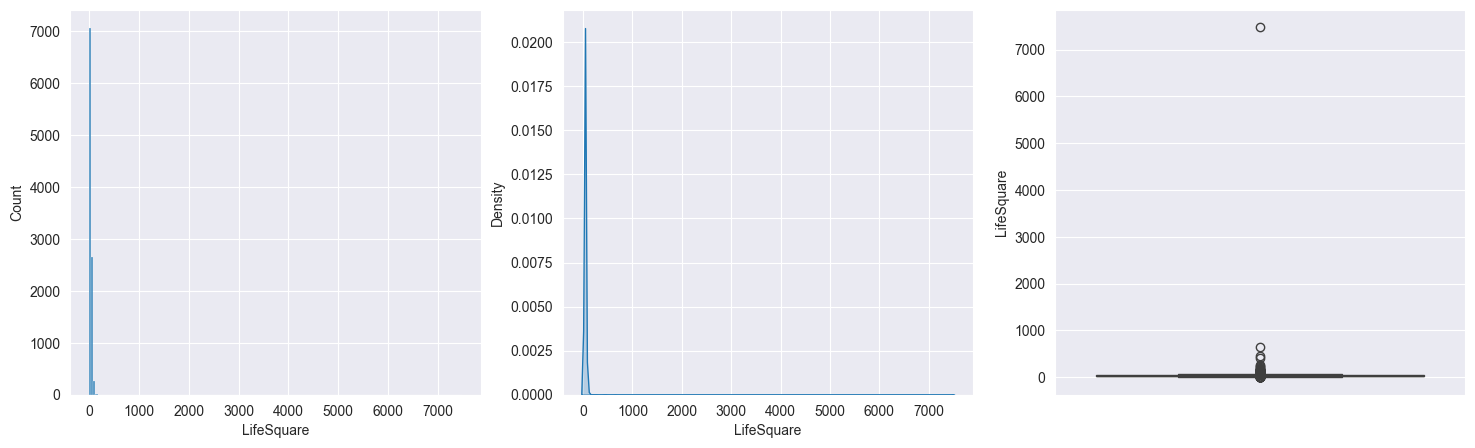

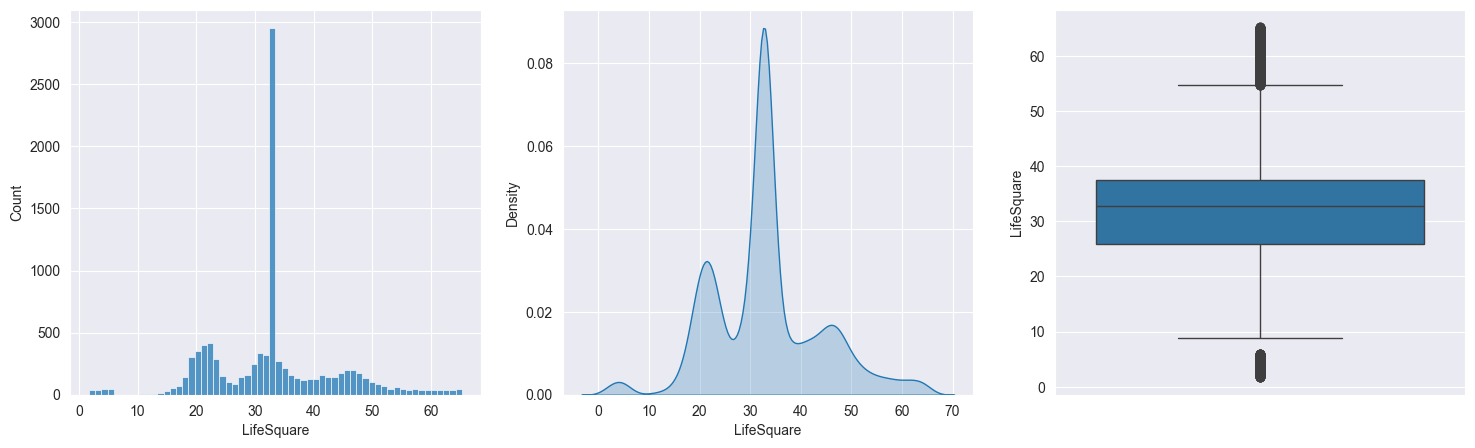

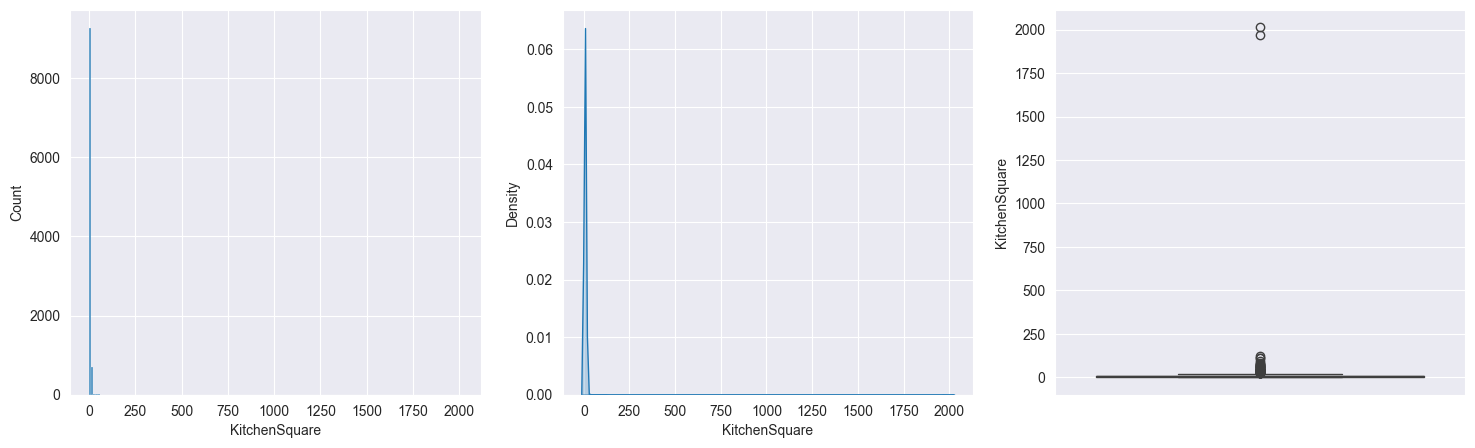

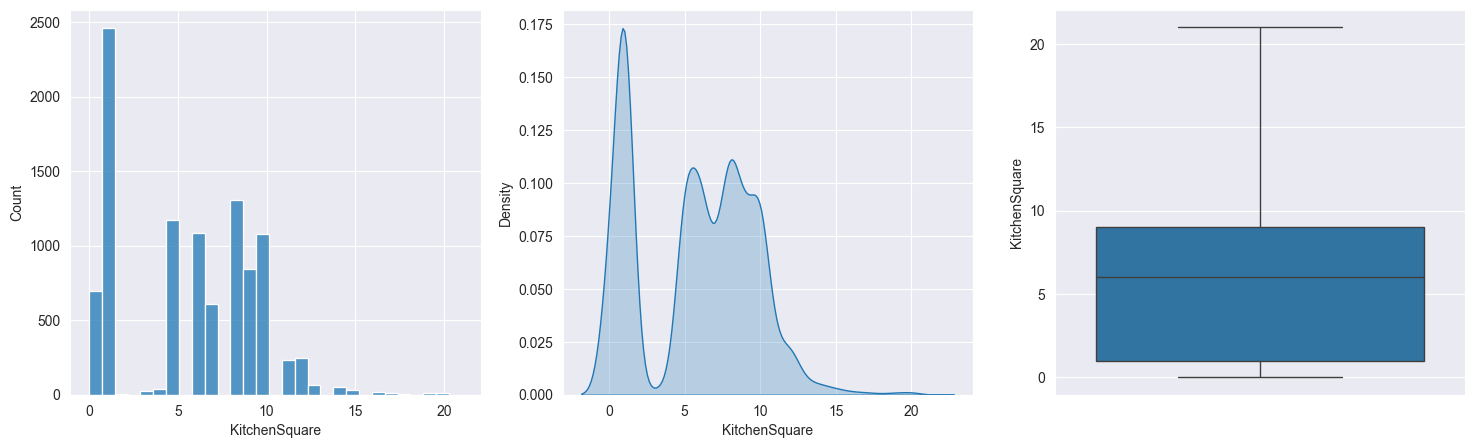

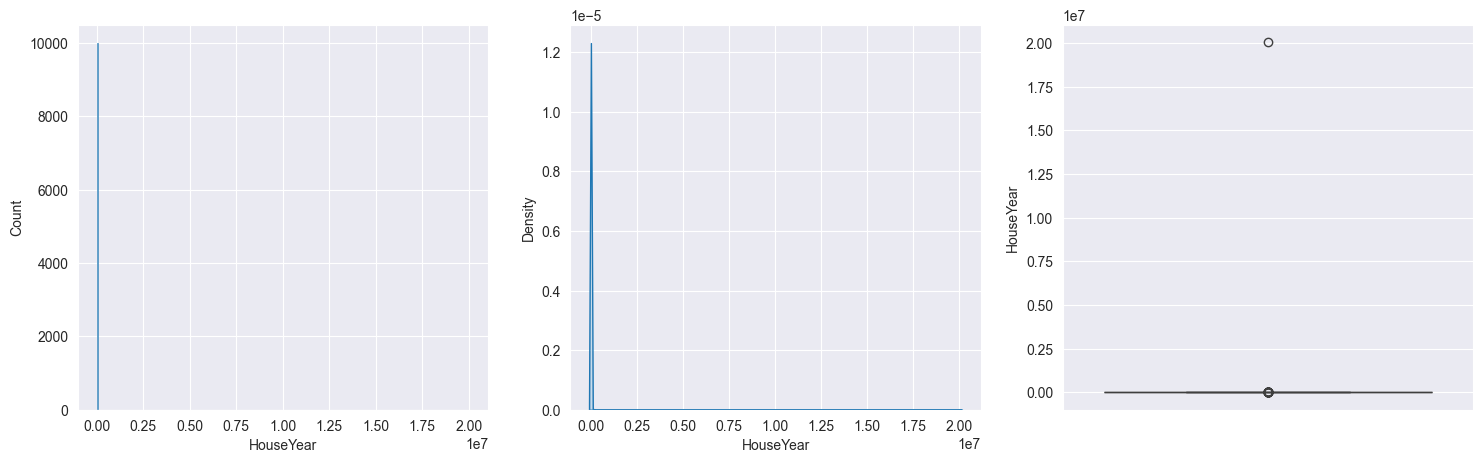

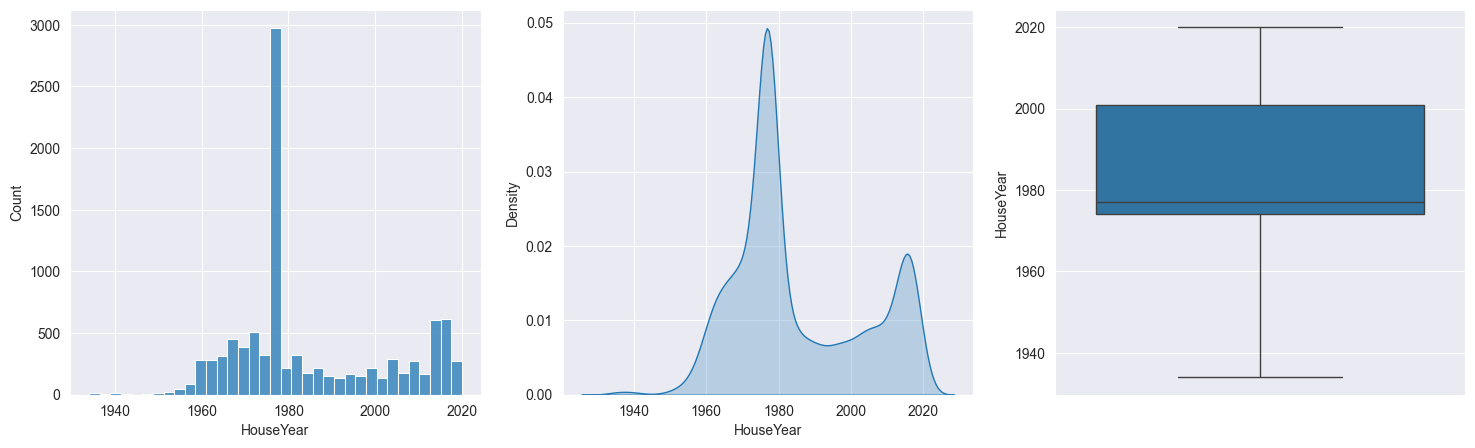

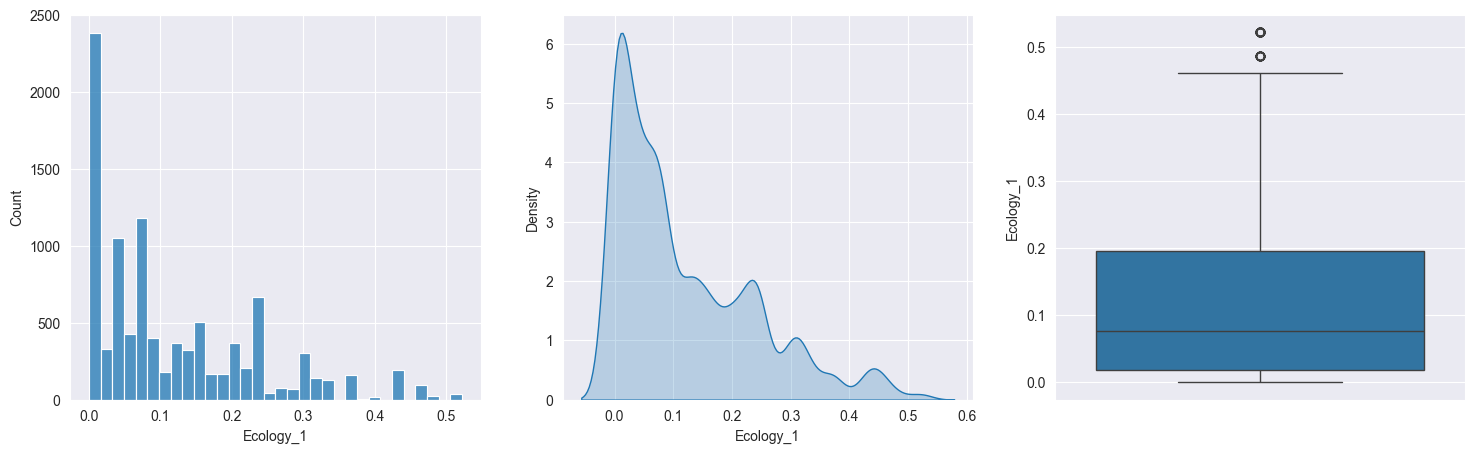

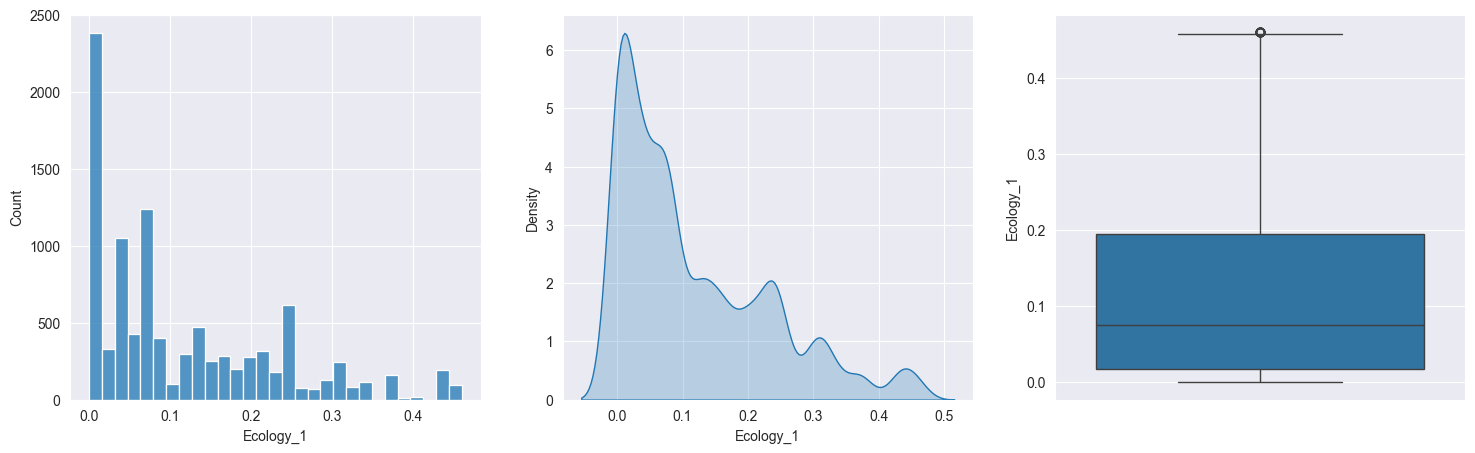

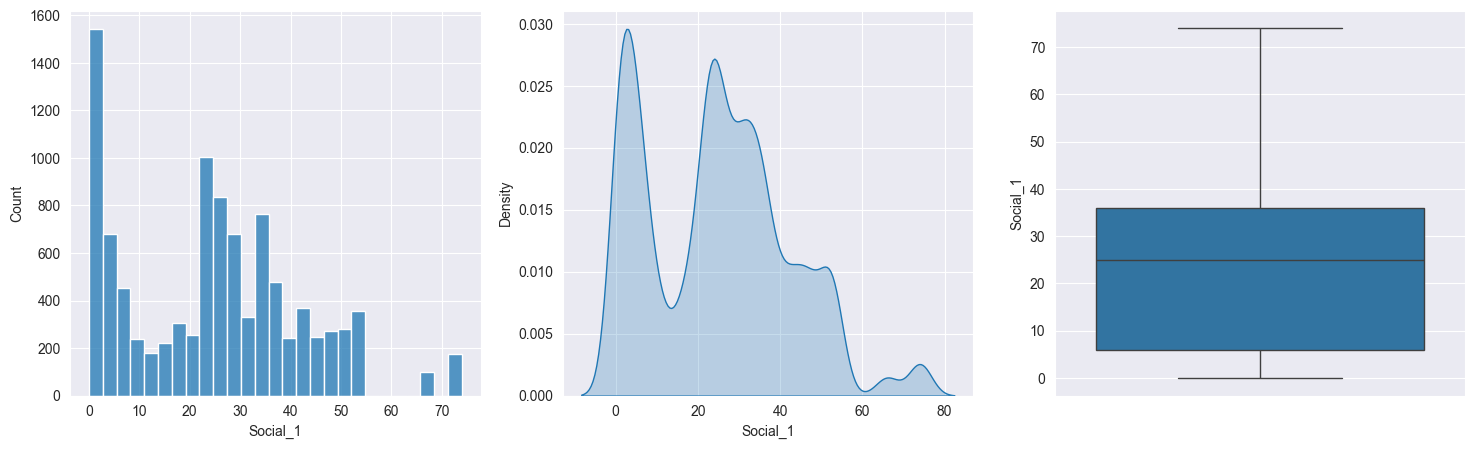

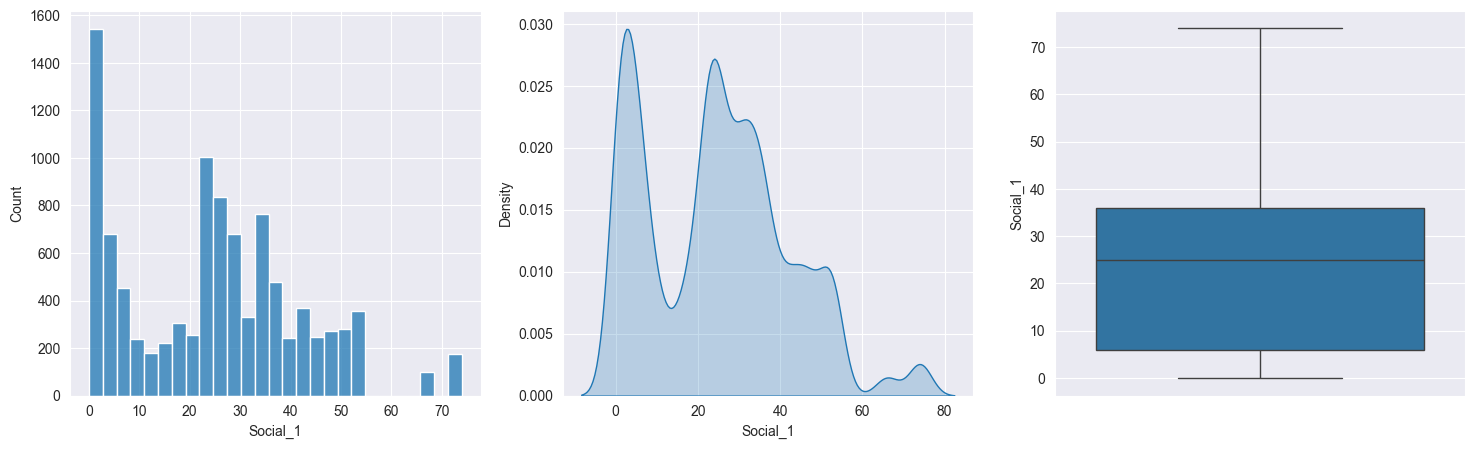

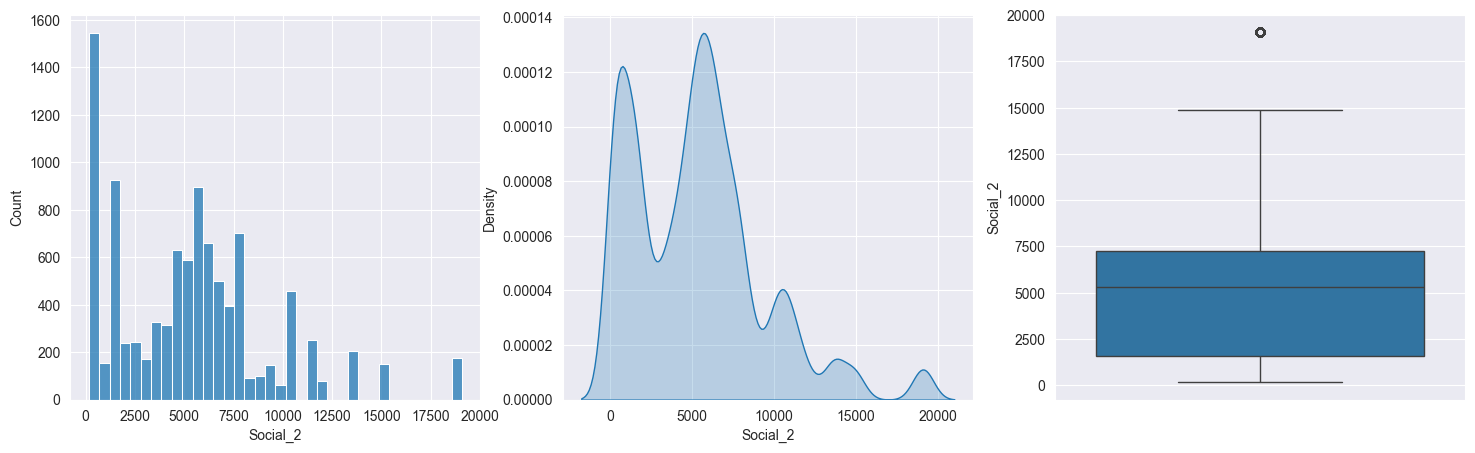

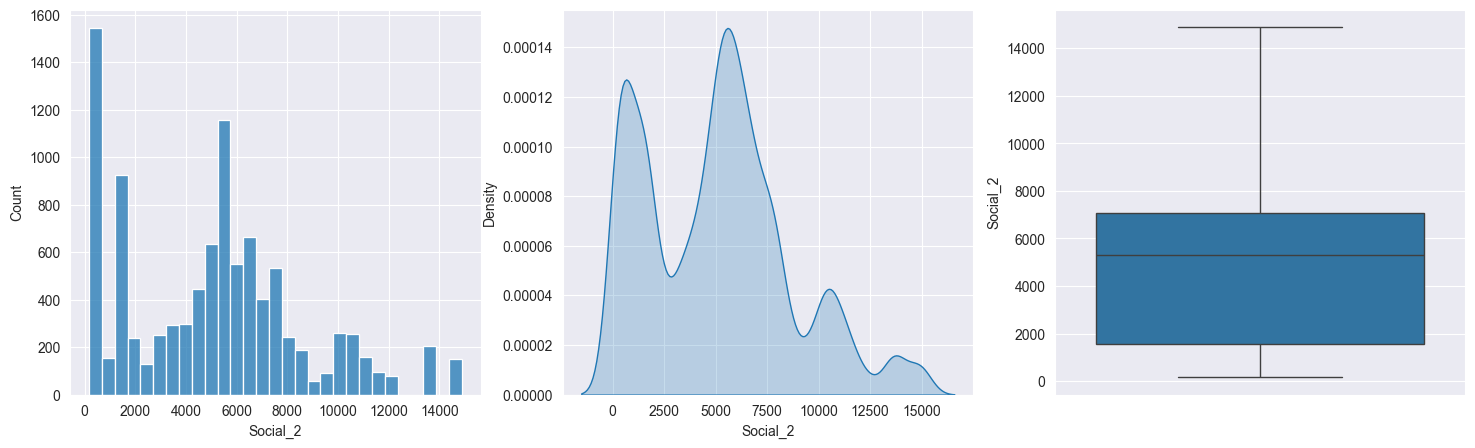

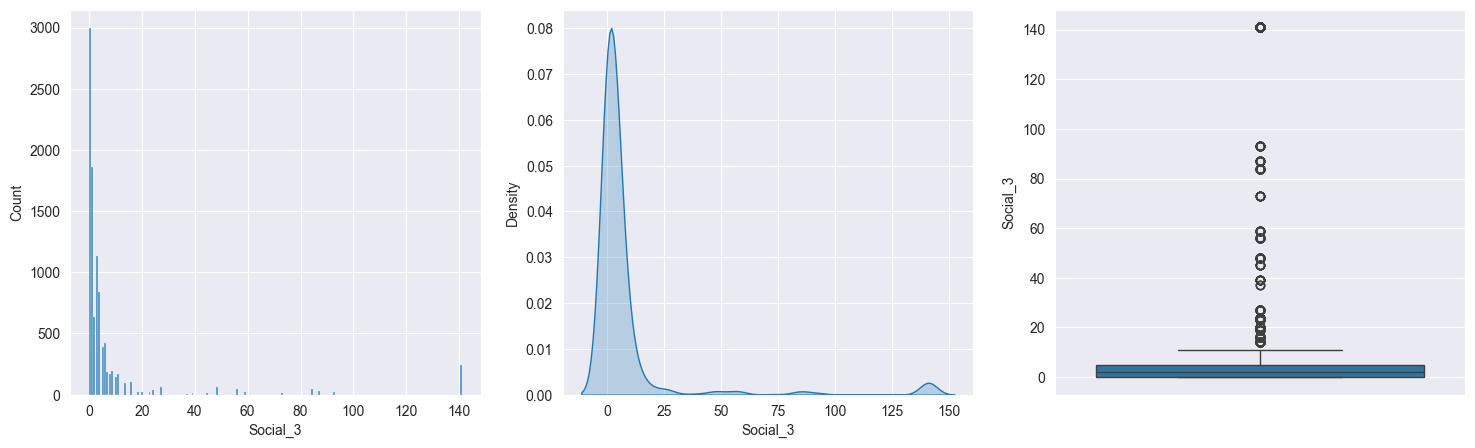

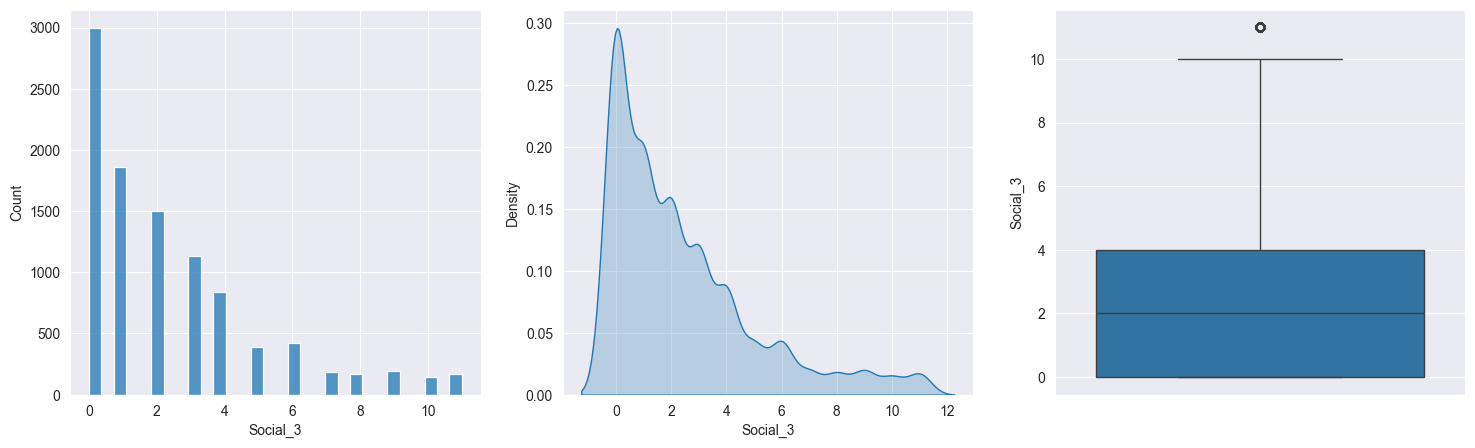

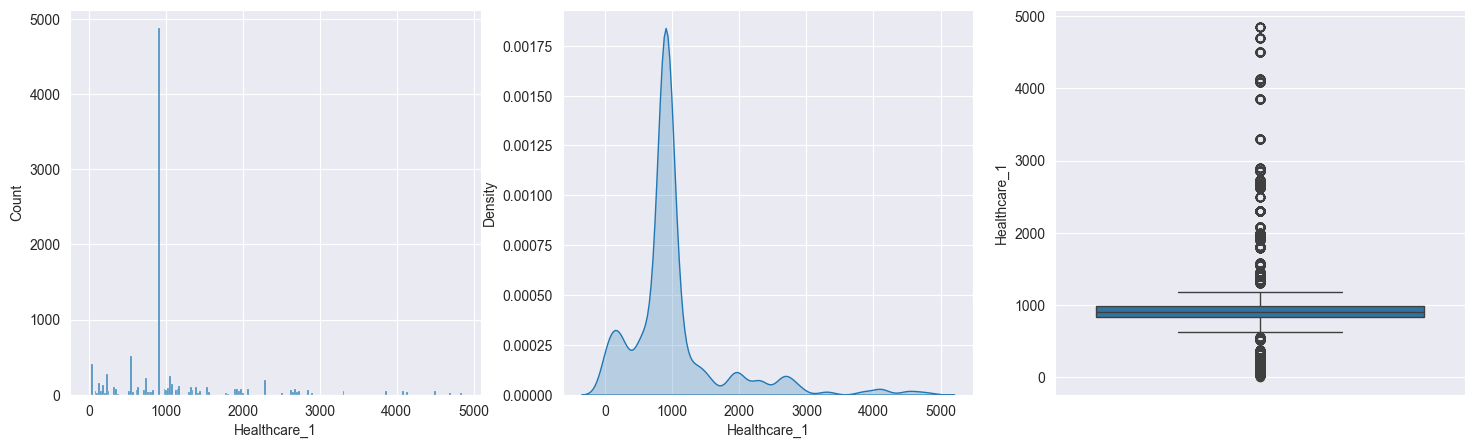

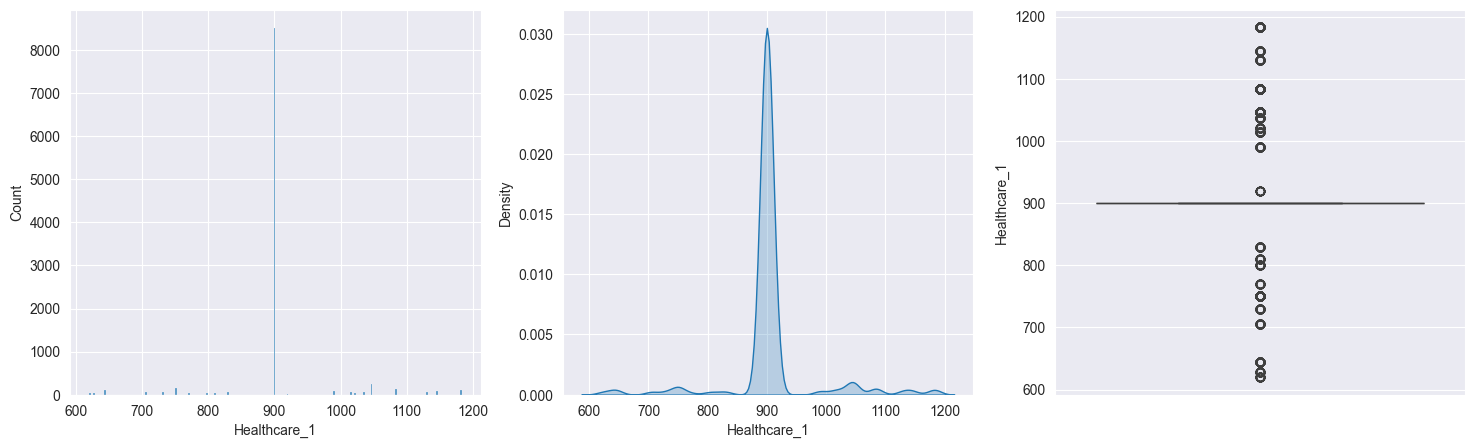

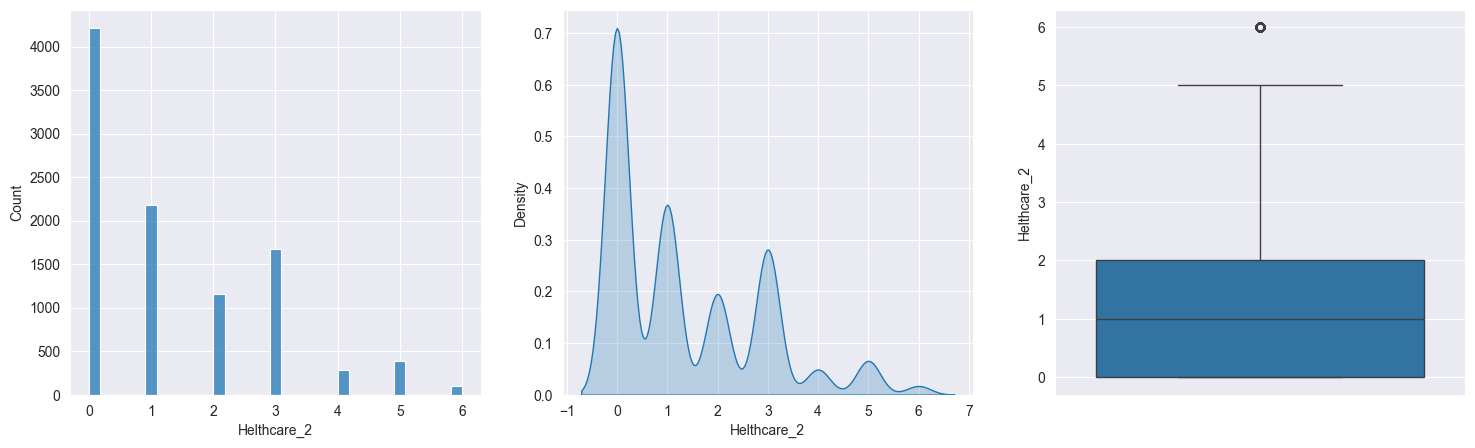

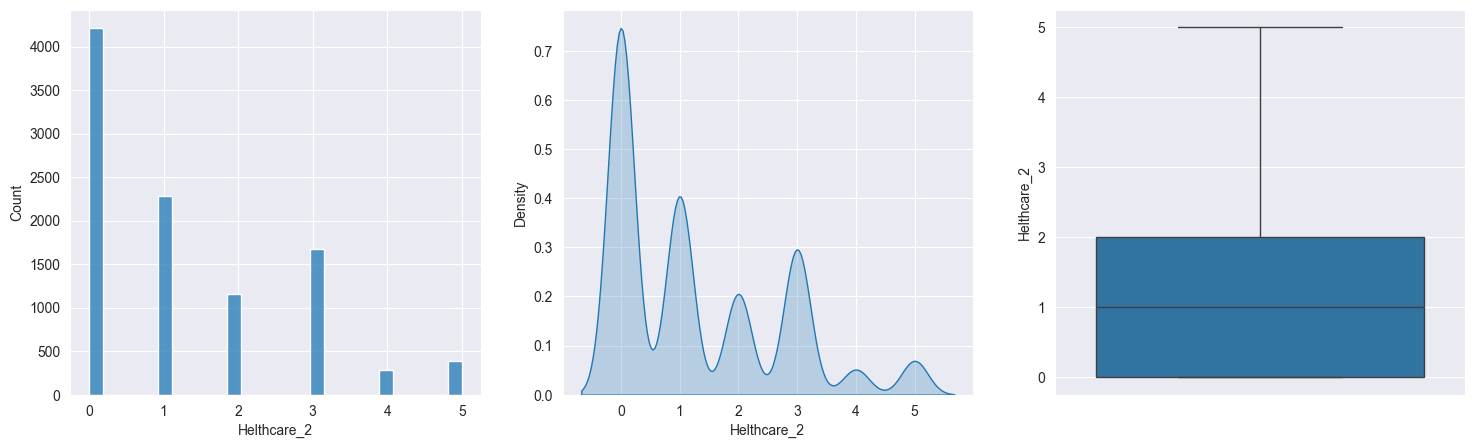

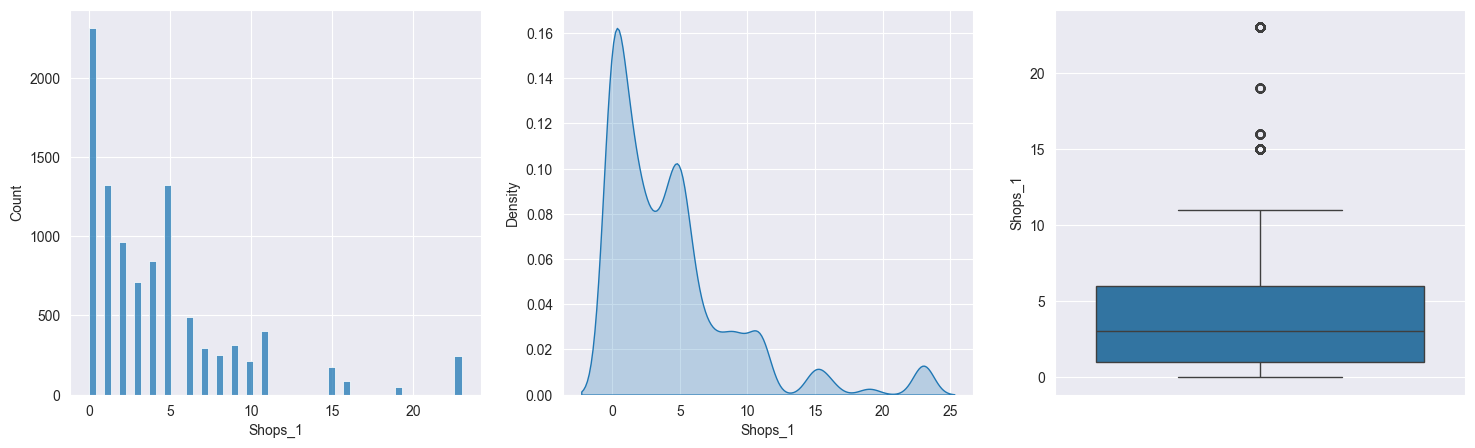

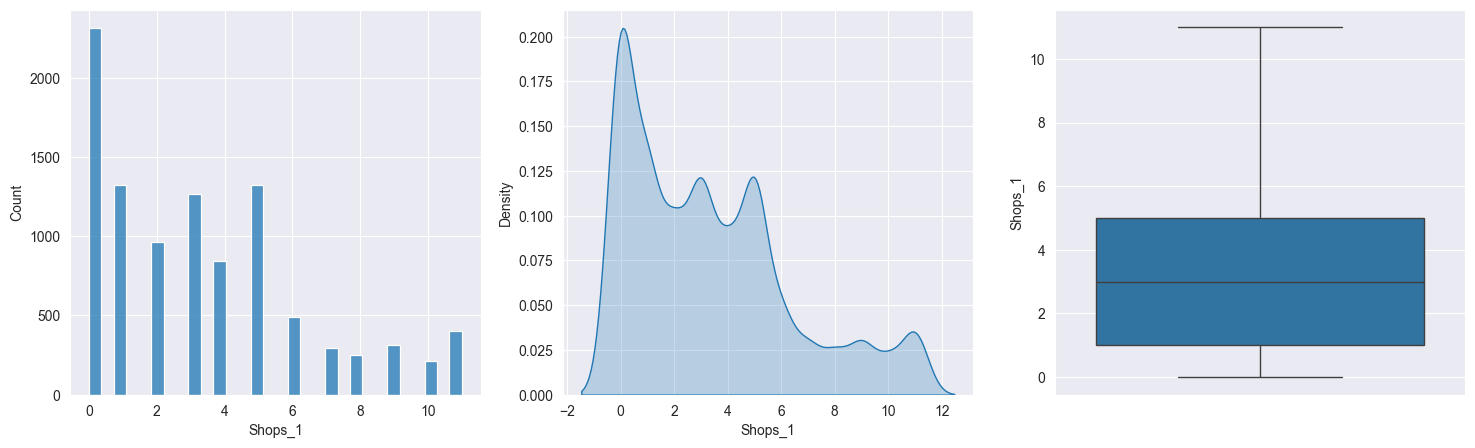

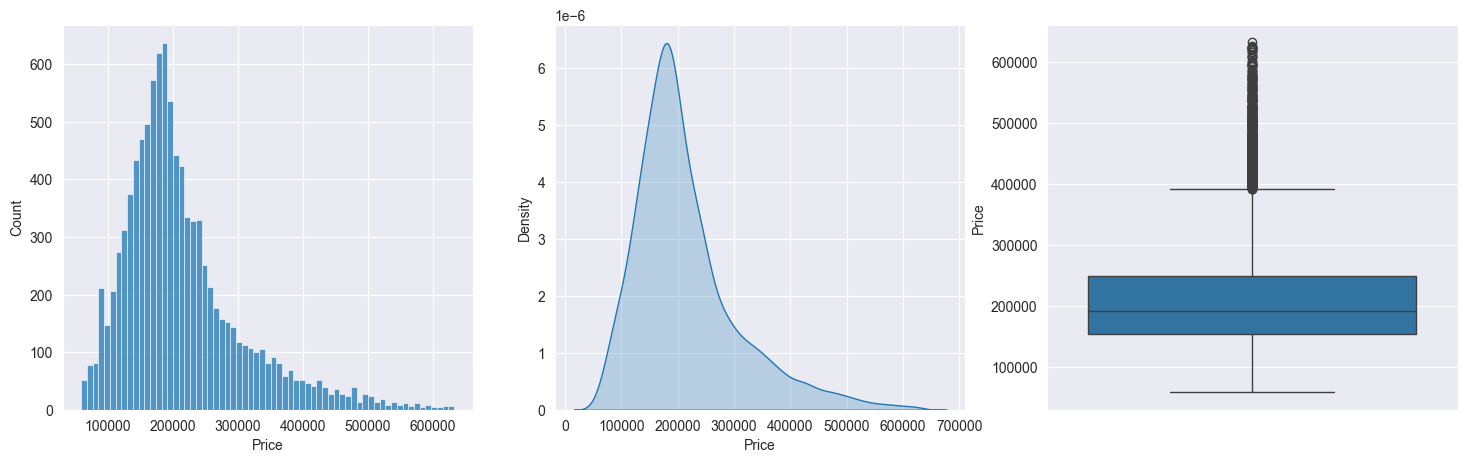

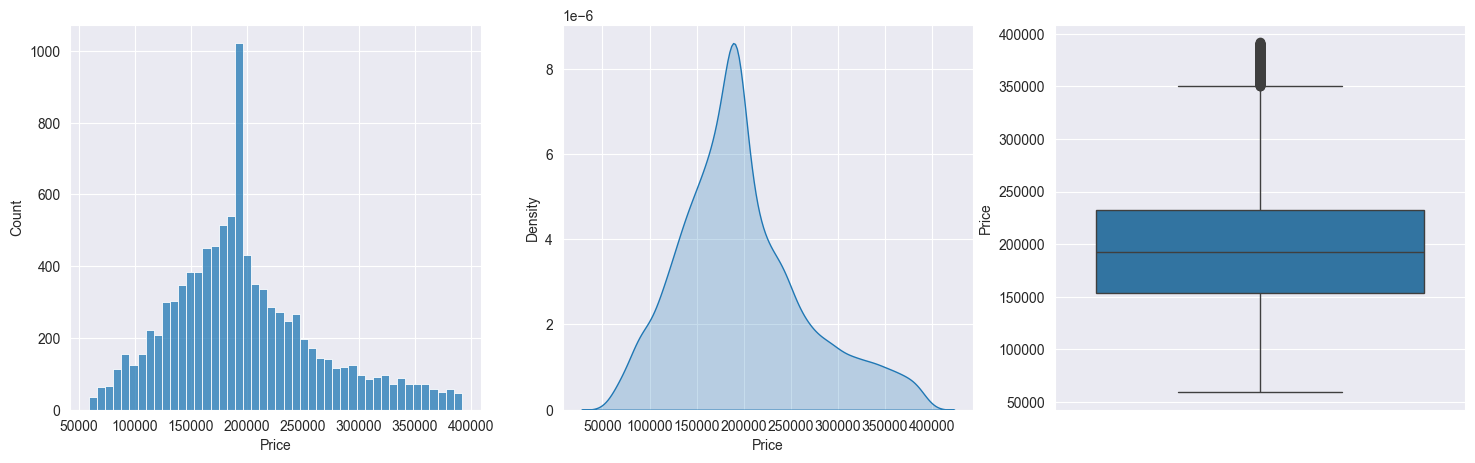

In [11]:
for column in train_data.columns:
    if train_data[column].dtype == np.dtypes.ObjectDType:
        continue
    if column == 'Floor' or column == 'HouseFloor':
        continue
    remove_outliers(column)


In [12]:
train_data = pd.get_dummies(train_data, dtype=int)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809.0,27,3.0,52.513310,32.781260,10.0,4,10.0,2014,0.075424,...,900.0,0,0,305018.871089,0,1,0,1,0,1
1,3013.0,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,177734.553407,0,1,0,1,0,1
2,8215.0,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,900.0,3,1,282078.720850,0,1,0,1,0,1
3,2352.0,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,900.0,0,1,168106.007630,0,1,0,1,0,1
4,13866.0,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,900.0,0,6,343995.102962,0,1,0,1,0,1


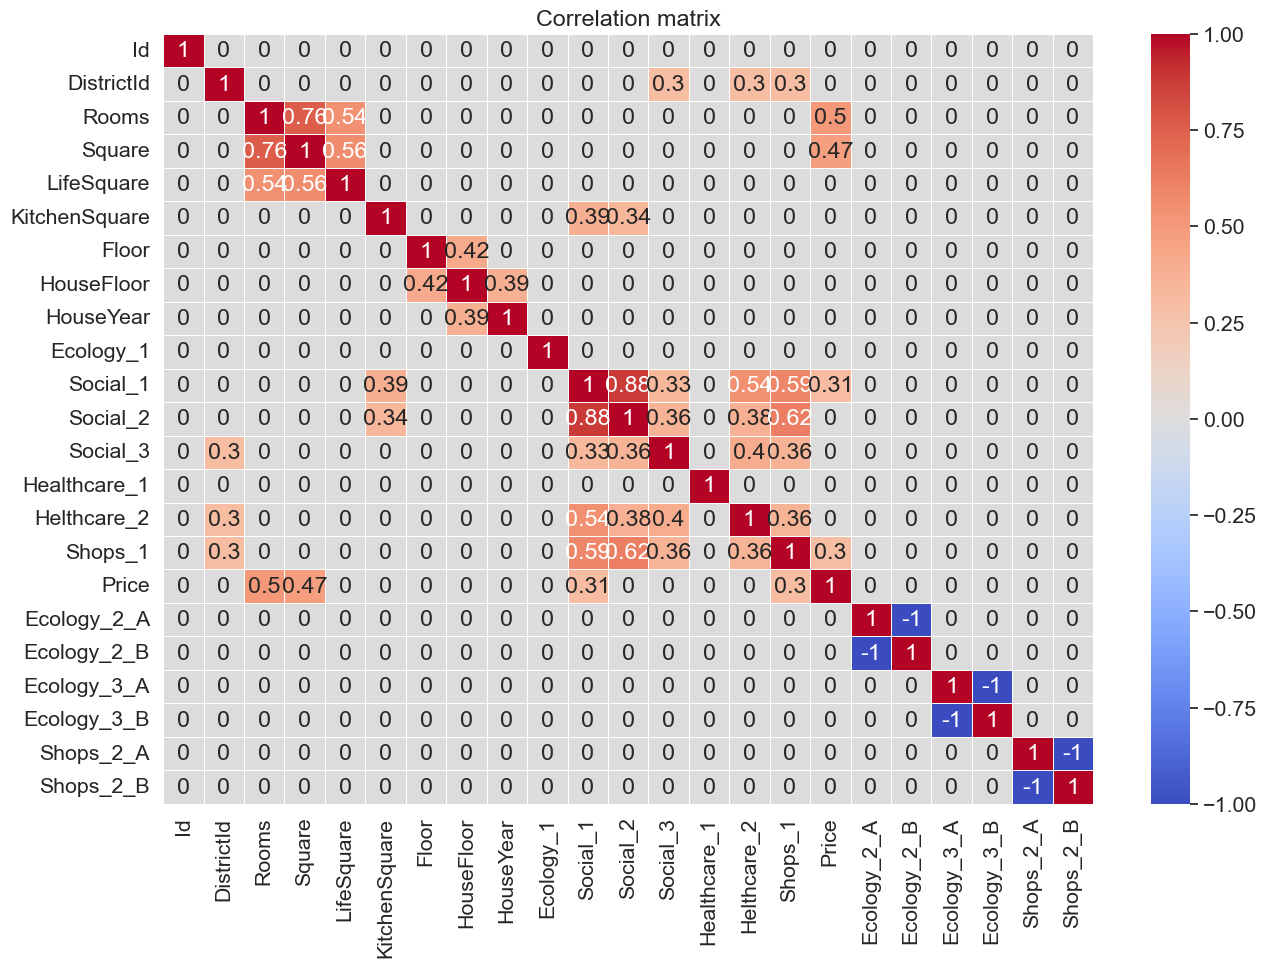

In [13]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_data.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, square=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[train_data.columns[:-6]])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_data.columns[:-6])

answer = pd.concat([X_train_scaled, train_data[train_data.columns[17:]]], axis=1)


In [15]:
answer

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0.705032,-0.512292,1.514573,-0.135034,-0.027677,1.114850,-0.863728,-0.385115,1.603794,-0.354489,...,-0.069721,-0.895277,-1.084587,1.604303,0,1,0,1,0,1
1,-1.105301,-0.643667,-1.122678,-0.934640,-0.920233,0.599050,-0.291306,-0.680290,-1.055585,0.020204,...,3.949634,-0.190334,-1.084587,-0.305228,0,1,0,1,0,1
2,-0.034661,-1.195445,1.514573,1.493647,1.355046,1.114850,-1.245343,0.647998,0.163297,-0.787417,...,-0.069721,1.219550,-0.760229,1.260153,0,1,0,1,0,1
3,-1.241343,-1.195445,-1.122678,-0.898232,-0.027677,-1.206249,0.281117,1.385936,-0.446144,-0.948083,...,-0.069721,-0.895277,-0.760229,-0.449676,0,1,0,1,0,1
4,1.128390,1.248143,0.195948,0.607252,0.509159,0.856950,1.425961,0.500411,-0.723163,1.447759,...,-0.069721,-0.895277,0.861558,2.189028,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.466091,0.381063,0.195948,-0.350850,0.017950,0.083250,-1.054535,-0.089940,-0.224529,1.600065,...,-0.069721,-0.190334,1.834631,-1.180857,0,1,0,1,0,1
9996,1.622135,-0.512292,0.195948,0.608678,0.367634,0.856950,0.853539,-1.860992,-0.446144,-0.382874,...,-0.069721,-0.895277,-1.084587,0.024527,0,1,0,1,1,0
9997,-1.150168,-0.275815,-1.122678,-1.576837,-1.534383,-0.174650,-1.054535,-1.123053,-1.498815,2.992627,...,-0.069721,-0.190334,0.537201,-0.481962,0,1,0,1,0,1
9998,1.271430,-0.669943,-1.122678,-1.407704,-0.998452,-0.174650,-1.054535,-0.532703,-0.889374,0.680288,...,-0.069721,1.219550,0.537201,-0.393623,0,1,0,1,0,1


In [16]:
answer.to_csv(path + "prepared_train.csv", index=False)

# Для задачи классификации (цель – предсказать факт невыполнения кредитных обязательств)

- Home Ownership - домовладение
- Annual Income - годовой доход
- Years in current job - количество лет на текущем месте работы
- Tax Liens - налоговые обременения
- Number of Open Accounts - количество открытых счетов
- Years of Credit History - количество лет кредитной истории
- Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
- Number of Credit Problems - количество проблем с кредитом
- Months since last delinquent - количество месяцев с последней просрочки платежа
- Bankruptcies - банкротства
- Purpose - цель кредита
- Term - срок кредита
- Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
- Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
- Monthly Debt - ежемесячный долг
- Credit Score - баллы кредитного рейтинга
- Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from scipy import stats
import numpy as np

In [92]:
path = "data/clas/"
filename_test = "test.csv"
filename_train = "train.csv"

res_test_file = path + filename_test
res_train_file = path + filename_train

test_data = pd.read_csv(res_test_file)
train_data = pd.read_csv(res_train_file)

## Предпросмотр данных

In [93]:
train_data.head() # Смотрим на первые 5 строчек, чтобы понять что у нас лежит в табличке

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [94]:
train_data.describe() # Первичный просмотр характеристик датасета

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [95]:
train_data.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [96]:
for col in train_data.columns:
    print(f"-{col}")
    print(train_data[col].dtypes)
    un = train_data[col].unique()
    print(len(un))
    if len(un) < 100:
        print(un)

-Home Ownership
object
4
['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
-Annual Income
float64
5479
-Years in current job
object
12
[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
-Tax Liens
float64
8
[0. 3. 1. 2. 4. 6. 5. 7.]
-Number of Open Accounts
float64
39
[11. 15.  8. 13. 12.  9. 17. 10.  7.  6. 14.  3. 20. 19. 22. 18.  5. 16.
  4.  2. 23. 24. 21. 25. 32. 33. 31. 30. 29. 28. 26. 27. 43. 41. 34. 38.
 35. 37. 42.]
-Years of Credit History
float64
408
-Maximum Open Credit
float64
6963
-Number of Credit Problems
float64
8
[1. 0. 3. 2. 6. 4. 5. 7.]
-Months since last delinquent
float64
90
[ nan  73.  18.   6.  40.  44.  45.  17.  61.  14.  11.  32.  75.  65.
  10.  28.  35.  29.  13.   8.  71.  54.  21.  68.  51.  70.  19.  22.
  16.  38.  36.   0.  34.  30.   3.  52.  72.  63.  23.   5.  60.  59.
   1.  74.   4.  42.  39.  41.  55.  67.  37.  47.  26.  76.  43.  12.
   7.  77.  48.  79.  80.  31.  64.  78.  

In [97]:
med = train_data['Annual Income'].median()
train_data['Annual Income'] = train_data['Annual Income'].fillna(med)

In [98]:
mode = train_data['Years in current job'].mode()[0]
train_data['Years in current job'] = train_data['Years in current job'].fillna(mode)

In [99]:
med = train_data['Months since last delinquent'].median()
train_data['Months since last delinquent'] = train_data['Months since last delinquent'].fillna(med)

In [100]:
med = train_data['Bankruptcies'].median()
train_data['Bankruptcies'] = train_data['Bankruptcies'].fillna(med)

In [101]:
med = train_data['Credit Score'].median()
train_data['Credit Score'] = train_data['Credit Score'].fillna(med)

In [102]:
def show_graph(column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(train_data[column], ax=axes[0])
    sns.kdeplot(train_data[column], ax=axes[1], fill=True)
    sns.boxplot(train_data[column], ax=axes[2])

def remove_outliers(column):
    show_graph(column)
    median = train_data[column].median()
    q25 = train_data[column].quantile(0.25)
    q75 = train_data[column].quantile(0.75)
    iq = q75 - q25

    min_border = q25 - 1.5 * iq
    max_border = q75 + 1.5 * iq

    mask = (train_data[column] < min_border) | (train_data[column] > max_border)

    train_data.loc[mask, column] = median

    show_graph(column)

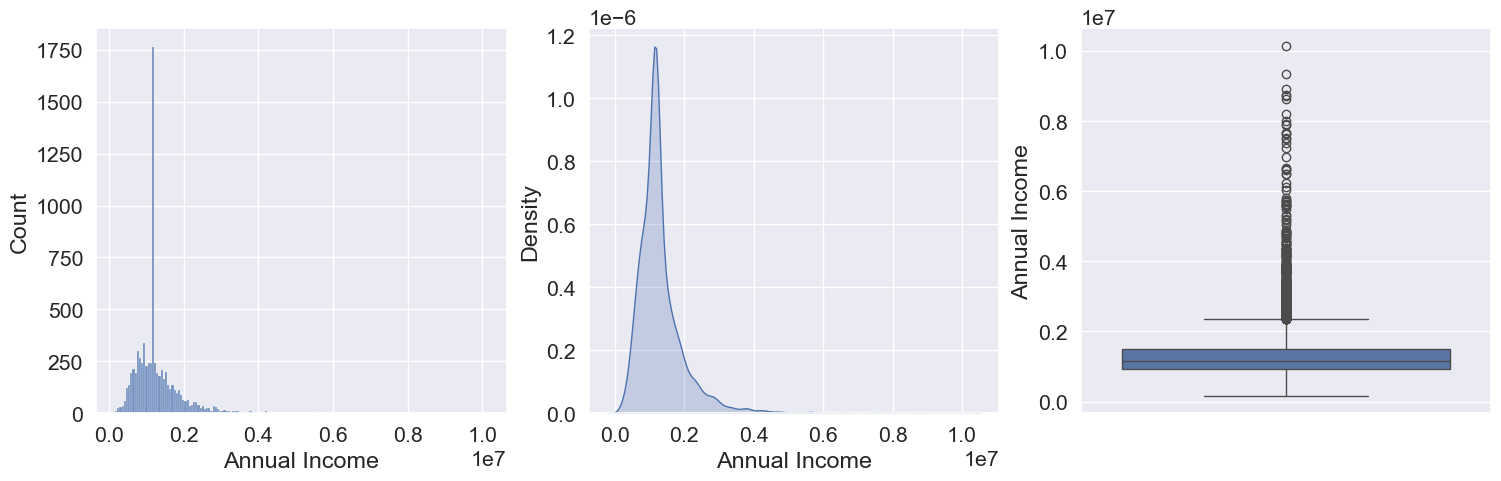

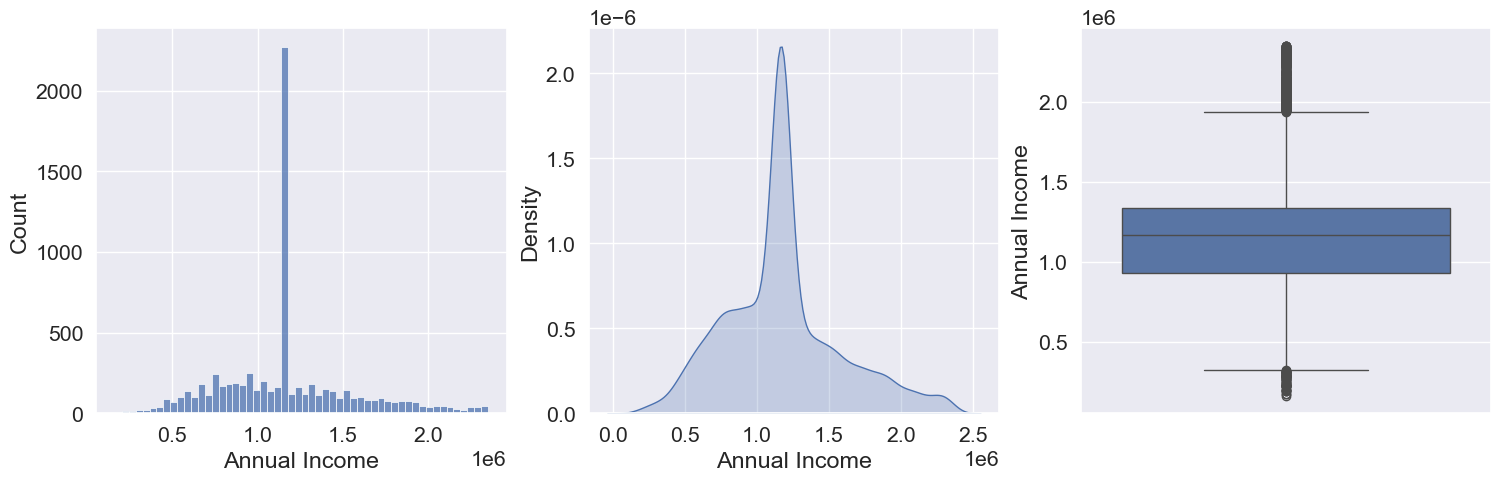

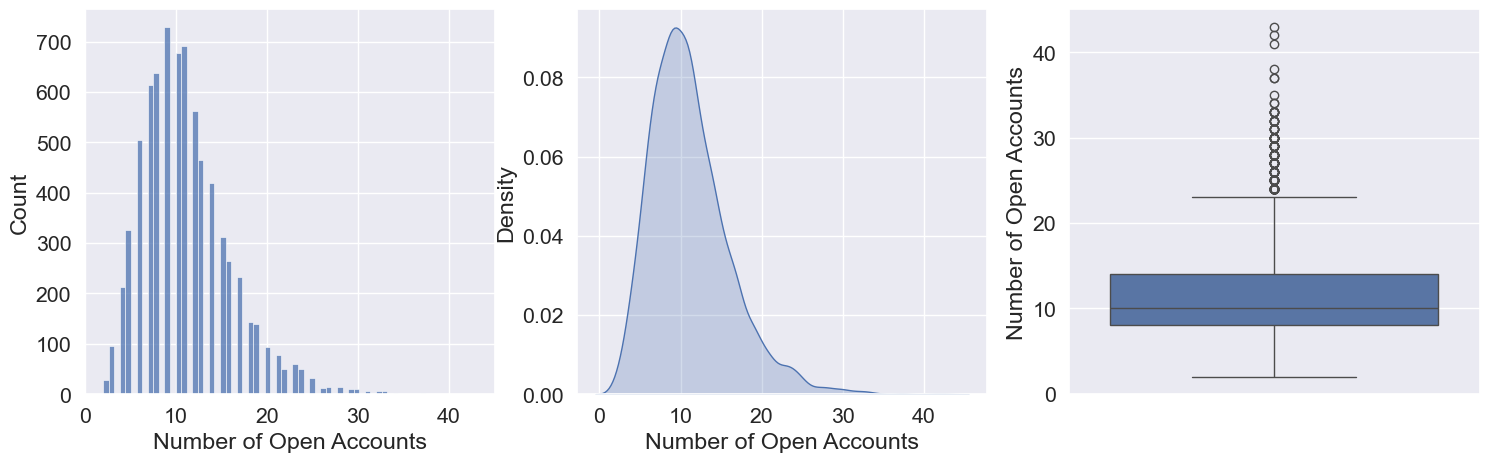

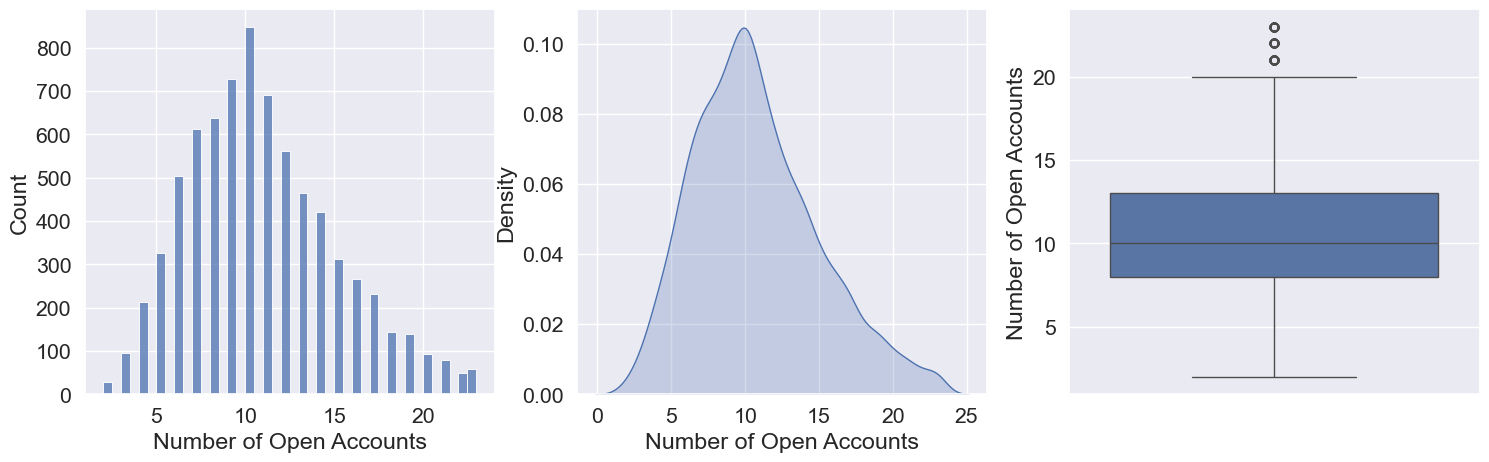

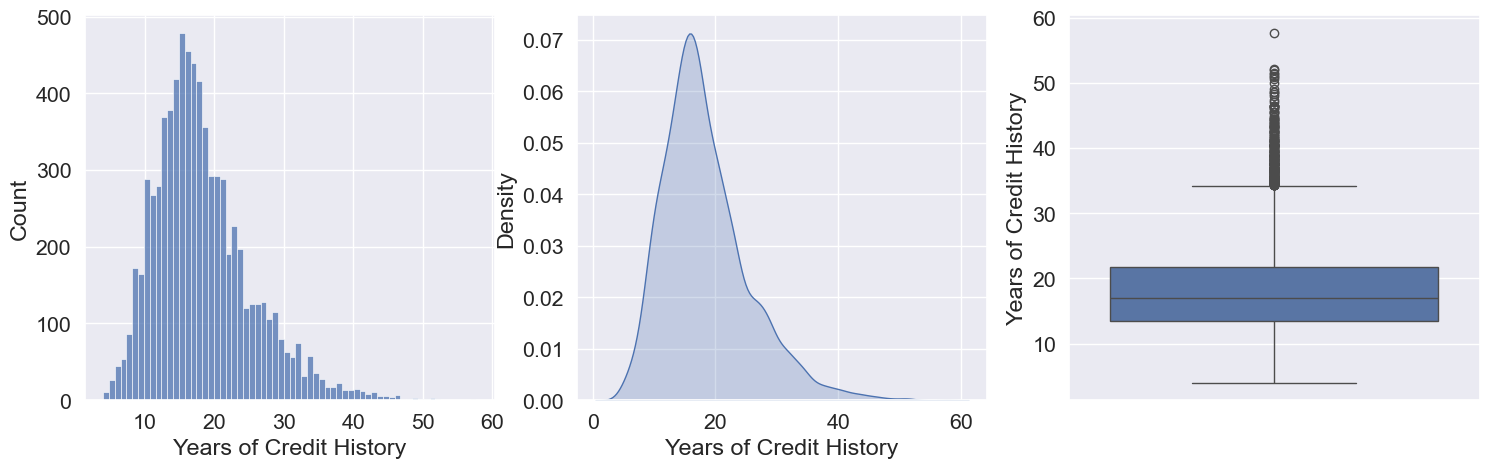

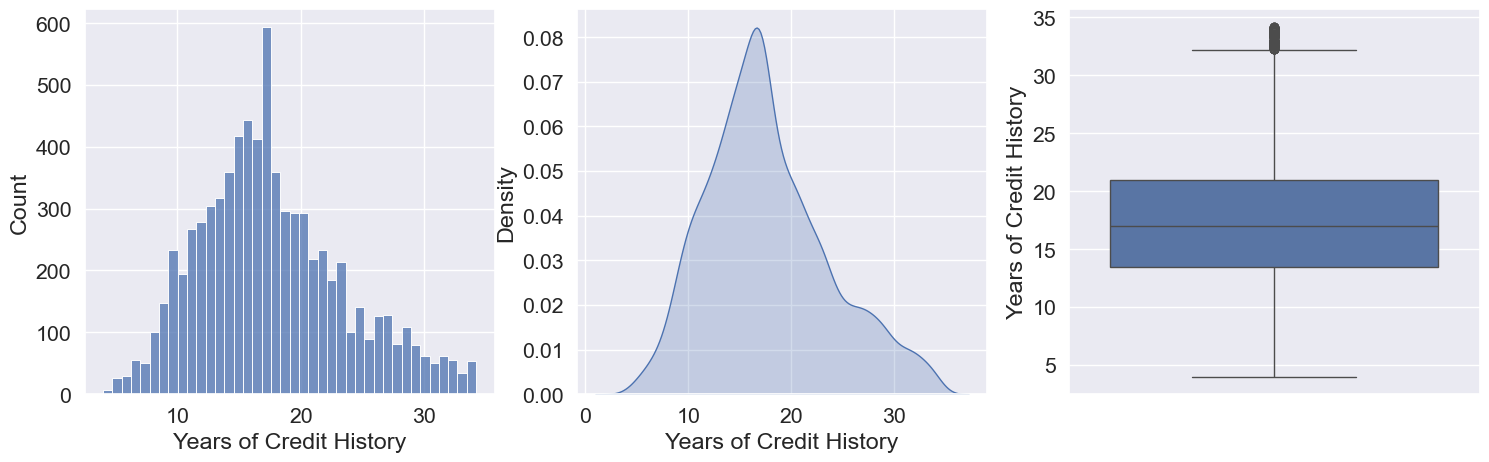

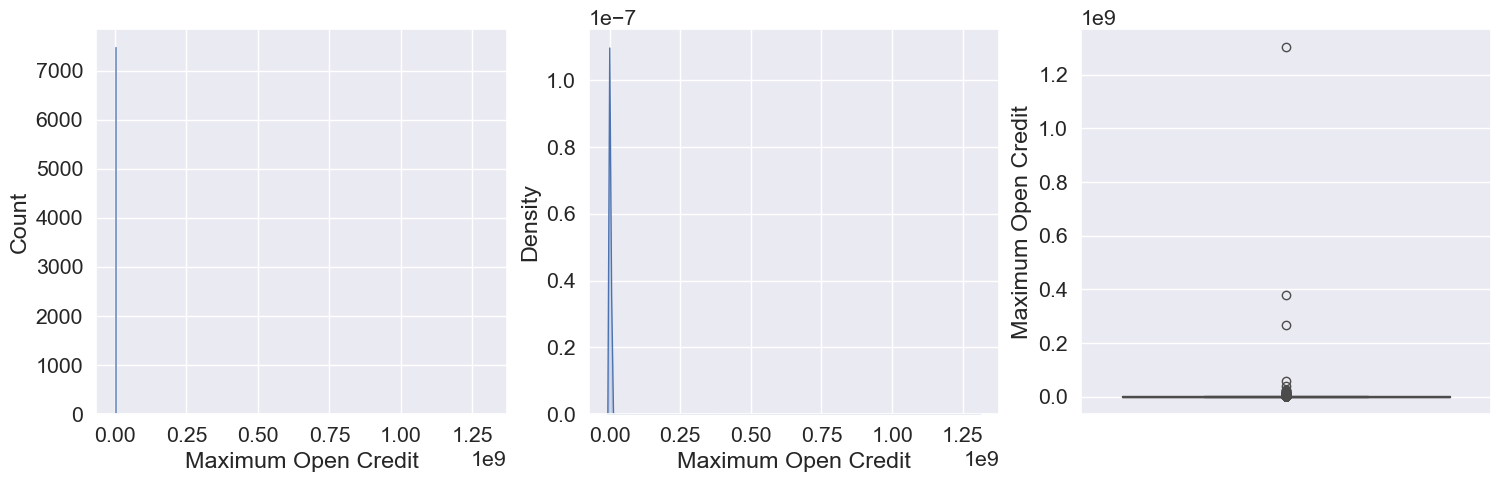

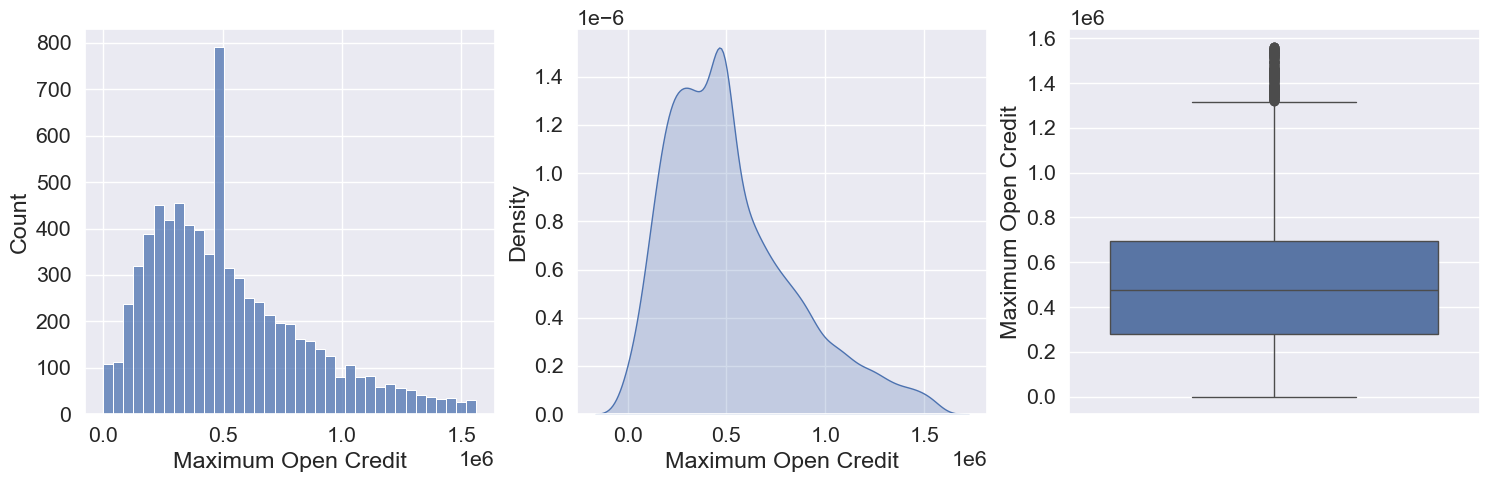

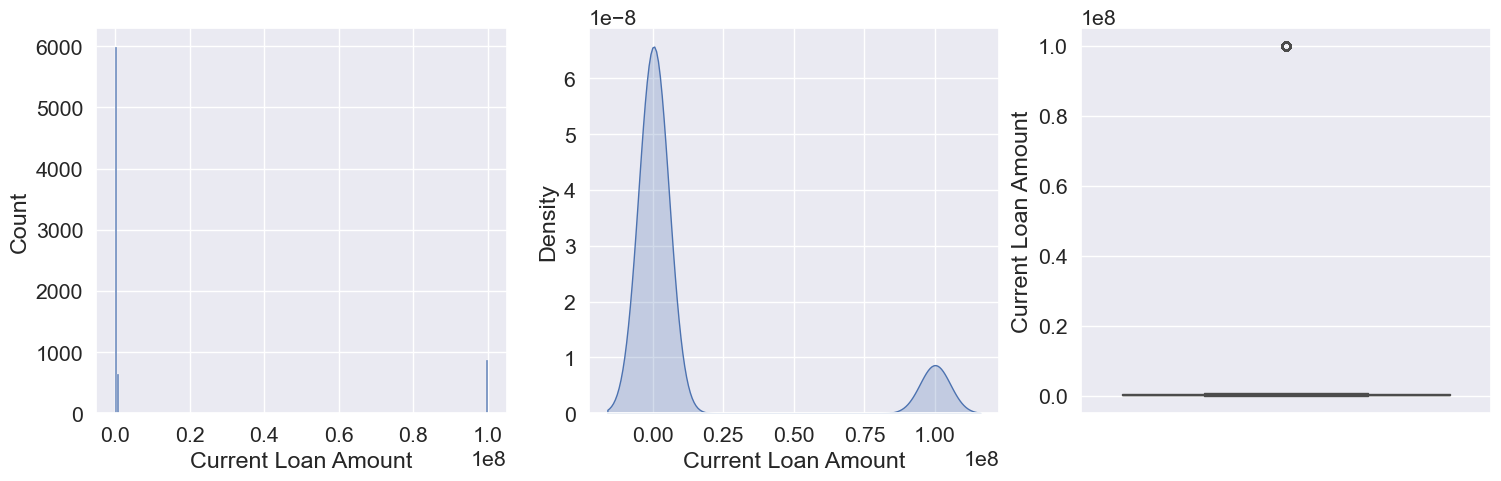

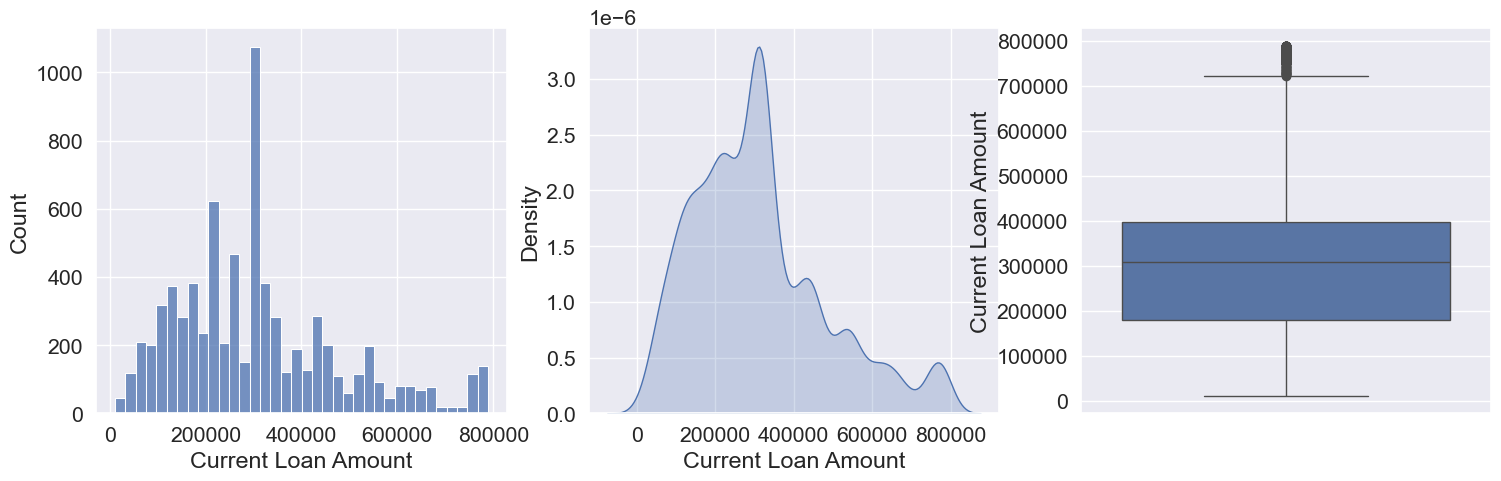

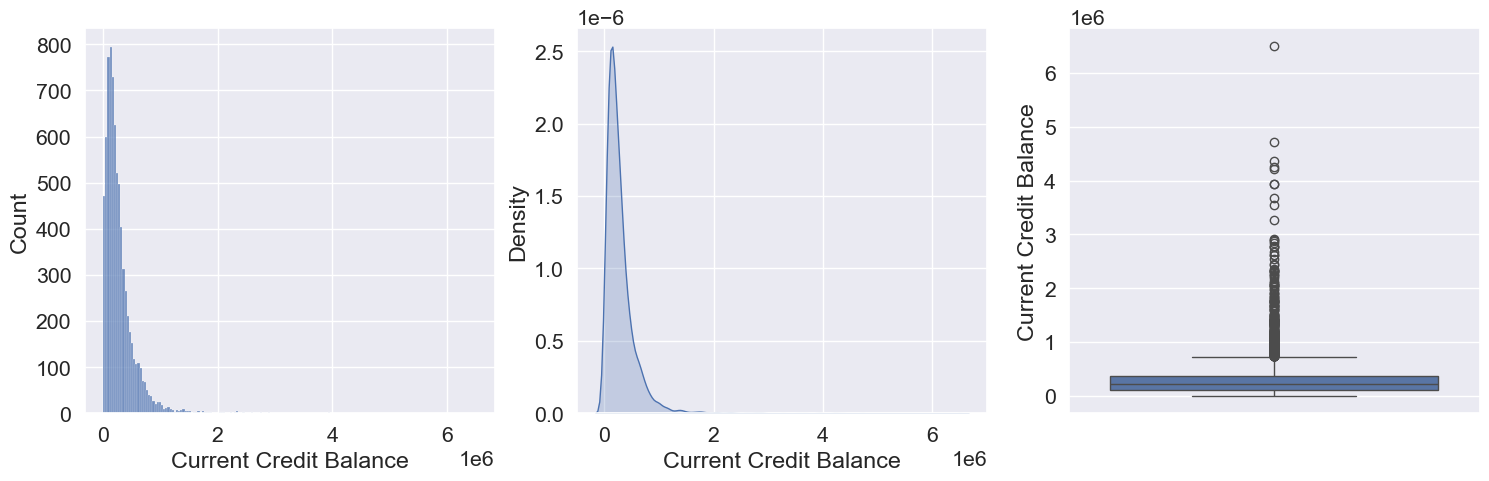

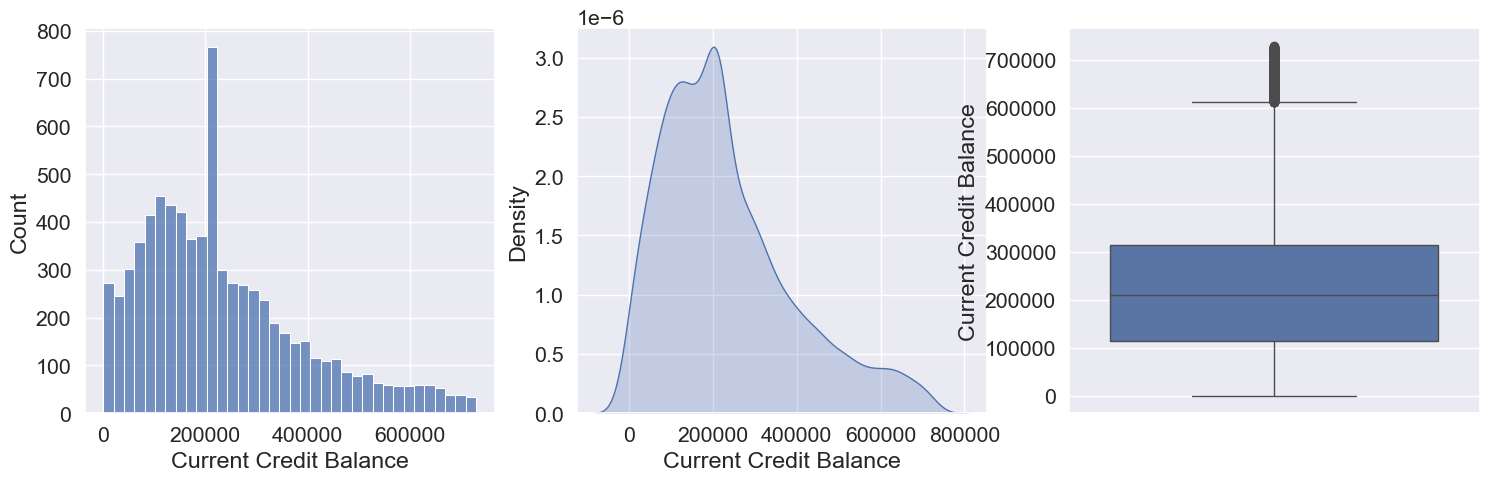

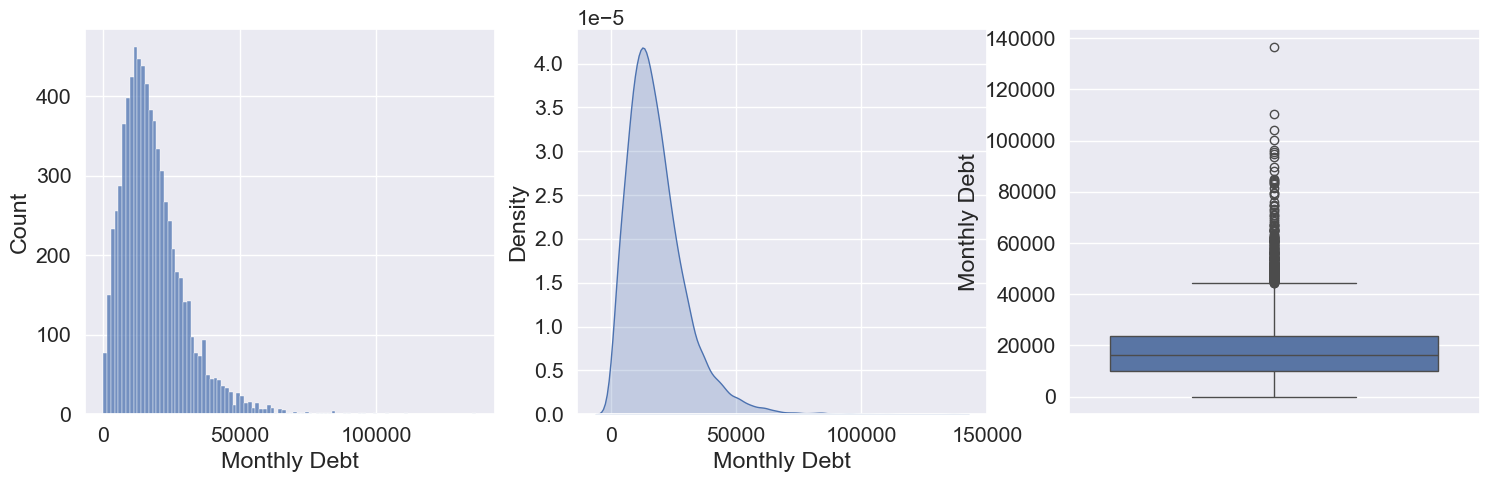

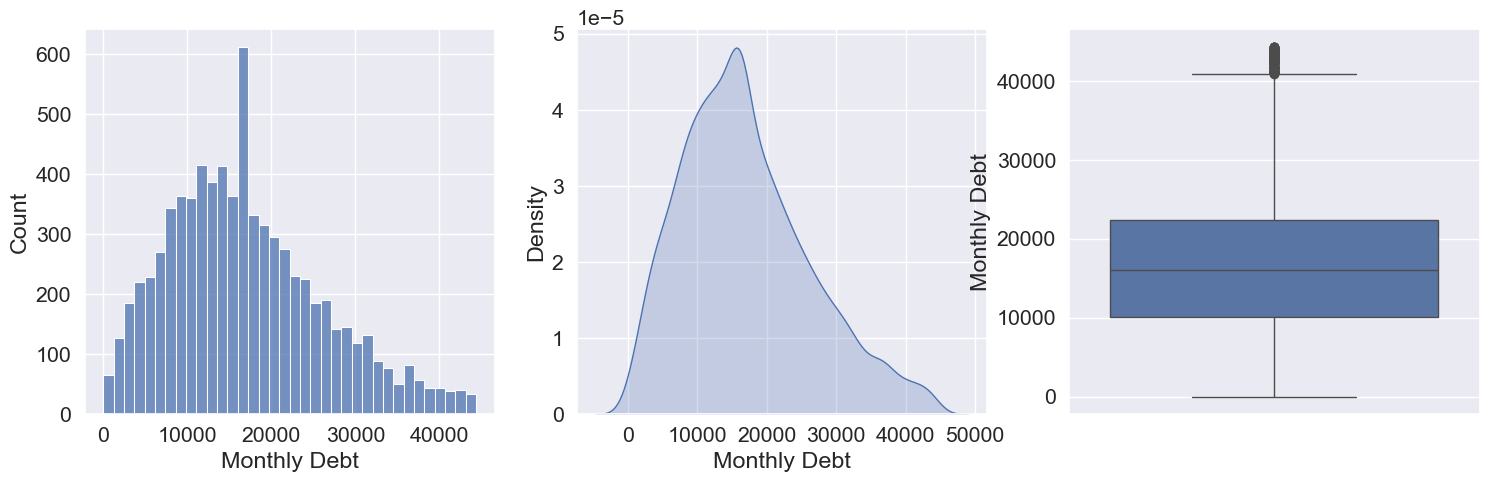

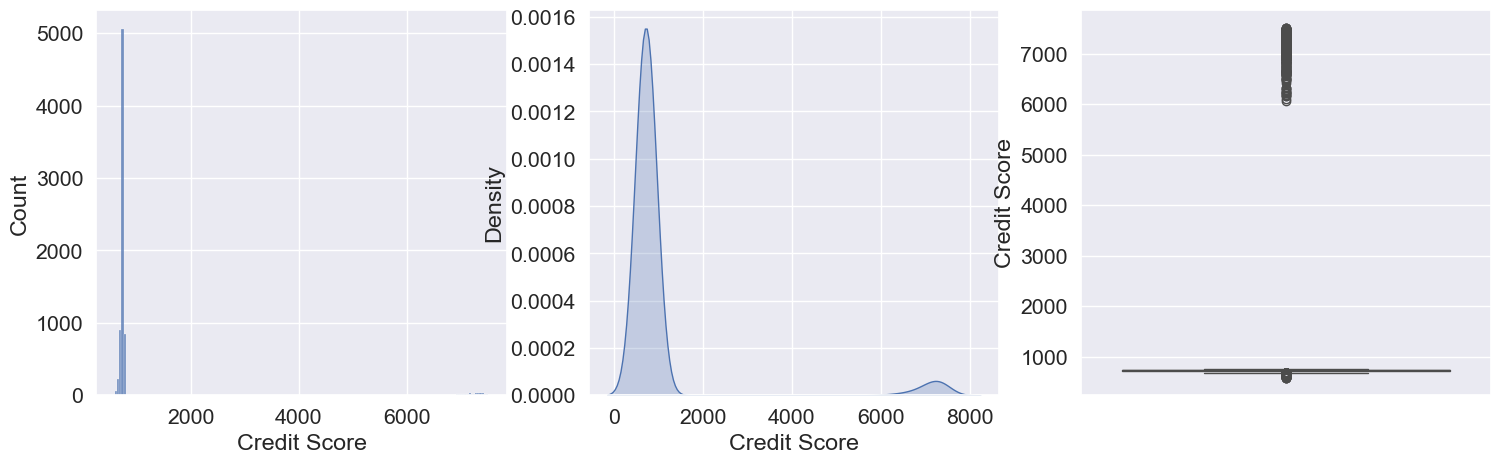

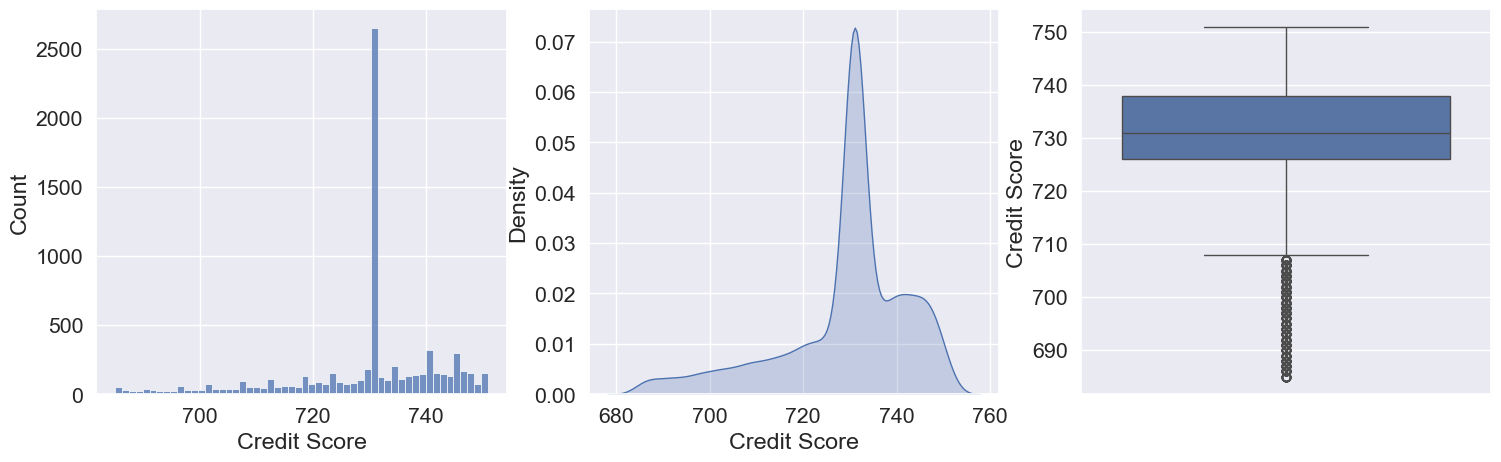

In [103]:
for column in train_data.columns:
    if train_data[column].dtype == np.dtypes.ObjectDType:
        continue
    if column in ["Tax Liens", "Credit Default", "Bankruptcies", "Number of Credit Problems", "Months since last delinquent"]:
        continue
    remove_outliers(column)

In [104]:
train_data = pd.get_dummies(train_data, dtype=int)
train_data.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,309573.0,47386.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,264968.0,394972.0,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,0.0,11.0,17.0,1182434.0,0.0,32.0,0.0,309573.0,308389.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,121396.0,95855.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,125840.0,93309.0,...,0,0,0,0,0,0,0,0,0,1


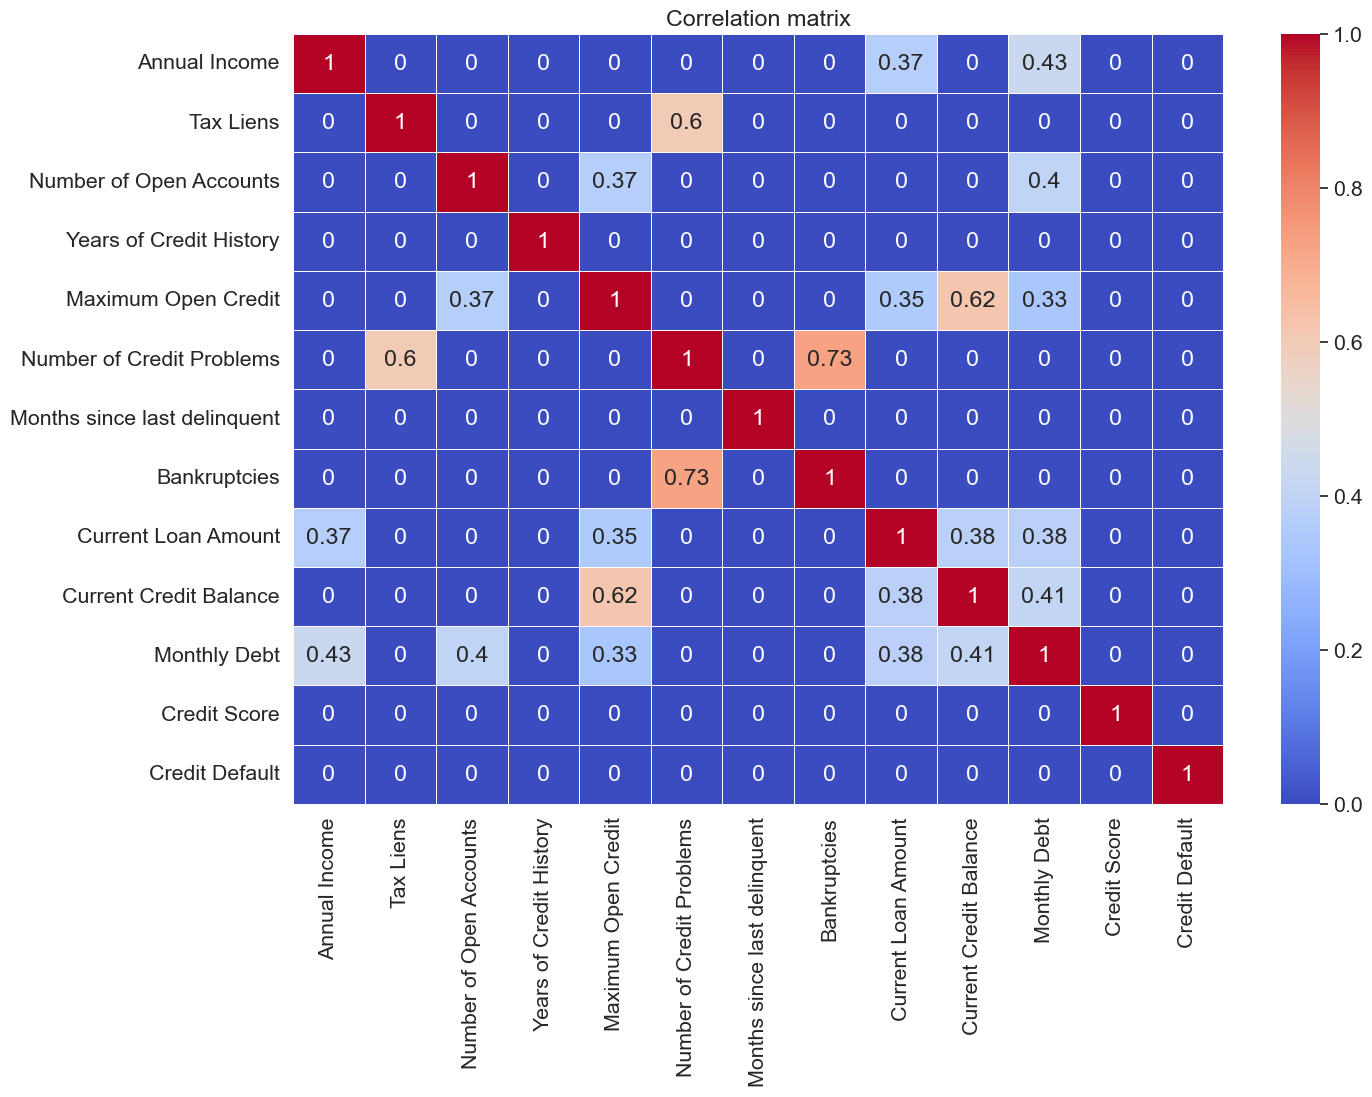

In [116]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_data[train_data.columns[:13]].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, square=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[train_data.columns[:12]])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_data.columns[:12])

answer = pd.concat([X_train_scaled, train_data[train_data.columns[12:]]], axis=1)

In [122]:
answer

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,-1.732745,-0.110953,0.061171,1.462346,0.513238,1.664779,-0.083484,2.545732,0.002830,-1.159368,...,0,0,0,0,0,0,0,0,0,1
1,-0.372872,-0.110953,1.008578,-0.394571,2.051622,-0.340979,-0.083484,-0.337099,-0.257436,1.014346,...,0,0,0,0,0,0,0,0,1,0
2,-1.058752,-0.110953,0.061171,-0.107593,2.053806,-0.340979,-0.083484,-0.337099,0.002830,0.472878,...,0,0,0,0,0,0,0,0,0,1
3,-0.924477,-0.110953,-0.649385,0.820865,-1.157924,1.664779,-0.083484,2.545732,-1.095166,-0.856255,...,0,0,0,0,0,0,0,0,0,1
4,-0.996559,-0.110953,0.534875,-0.681549,-0.418053,1.664779,-0.083484,-0.337099,-1.069235,-0.872177,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.932684,-0.110953,-1.833644,-1.542484,-1.280599,-0.340979,-0.083484,-0.337099,-1.048696,-0.996107,...,0,0,1,0,0,0,0,0,0,1
7496,0.899655,-0.110953,-0.175681,1.496108,0.514330,-0.340979,0.664664,-0.337099,0.787479,1.398495,...,0,0,0,0,0,0,0,0,1,0
7497,1.762841,-0.110953,0.298023,2.441447,-0.131573,-0.340979,-0.083484,-0.337099,0.002830,1.532406,...,0,0,0,0,0,0,0,0,0,1
7498,-0.015264,-0.110953,2.429689,1.496108,1.926012,-0.340979,-0.083484,-0.337099,1.786567,1.521475,...,0,0,0,0,0,0,0,0,0,1


In [123]:
answer.to_csv(path + "prepared_train.csv", index=False)